In [32]:
import os
import pandas as pd
import json
import pickle
from collections import defaultdict
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
    
from src.data import load_source, slice_d
from src.config import Config, get_option_fallback
from knowledge_tracing.trainer import Trainer

In [2]:
with open('../data/Asteria_Eng_ver5.1_dic.pickle', 'rb') as f:
    problems_dic = pickle.load(f)

In [3]:
projectdir = Path('/code')
assert projectdir.exists()

## 学習者によらない正解率を出す

In [4]:
data = load_source('Asteria_Eng_ver5')

correct_count = defaultdict(int)
wrong_count = defaultdict(int)

for seq in data:
    for x in seq:
        if x[1] == 1:
            correct_count[x[0]] += 1
        else:
            wrong_count[x[0]] += 1

correctness = []
for sid in correct_count.keys():
#     print('{:.2f} ({}/{})'.format(correct_count[sid] / (correct_count[sid]+wrong_count[sid]), correct_count[sid], correct_count[sid]+wrong_count[sid]))
    correctness.append(correct_count[sid] / (correct_count[sid]+wrong_count[sid]))

Over 0.80: 28.2%(92/326)


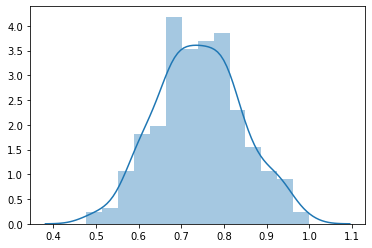

In [5]:
# correctness = np.array(correctness) 
over_080 = len([c for c in correctness if c > 0.8])
print('Over 0.80: {:.1f}%({}/{})'.format(over_080/len(correctness)*100, over_080, len(correctness)))
sns.distplot(correctness)

# スキルごとの正解率を出す

In [6]:
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
from src.config import Config
from knowledge_tracing.trainer import Trainer

In [8]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1424_seq20ks00_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1424_seq20ks00_ksdkt/checkpoints/ksdkt_auc0.6632_e700.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 5223
INFO:ksdkt:eval_dl.dataset size: 1256
INFO:ksdkt:The model has 558,904 trainable parameters
/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([20, 1, 1])) that is different to the input size (torch.Size([20, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


211 115


In [22]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1428_seq20ks05_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1428_seq20ks05_ksdkt/checkpoints/ksdkt_auc0.6618_e700.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 5168
INFO:ksdkt:eval_dl.dataset size: 1311
INFO:ksdkt:The model has 558,904 trainable parameters


214 112


In [24]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1433_seq11ks00_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1433_seq11ks00_ksdkt/checkpoints/ksdkt_auc0.6216_e300.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 11123
INFO:ksdkt:eval_dl.dataset size: 2991
INFO:ksdkt:The model has 558,904 trainable parameters
/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([11, 1, 1])) that is different to the input size (torch.Size([11, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


219 107


In [25]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1441_seq11ks05_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1441_seq11ks05_ksdkt/checkpoints/ksdkt_auc0.6401_e900.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 11351
INFO:ksdkt:eval_dl.dataset size: 2763
INFO:ksdkt:The model has 558,904 trainable parameters


224 102


In [7]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1441_seq11ks05_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1441_seq11ks05_ksdkt/checkpoints/ksdkt_auc0.6401_e900.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
trainer.evaluate_model()

# good = 0
# bad = 0
# for v in problems_dic.values():
#     # wrong
#     wro = trainer.model(torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0),
#                         torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0))
#     wro = wro['pred_prob']
#     # correct
#     cor = trainer.model(torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0),
#                         torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0))
#     cor = cor['pred_prob']
#     if (cor - wro)[-1].item() < 0:
#         bad += 1
#     else:
#         good += 1
# print(good, bad)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 11310
INFO:ksdkt:eval_dl.dataset size: 2804
INFO:ksdkt:The model has 558,904 trainable parameters
INFO:ksdkt:Starting evaluation
/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([11, 1, 1])) that is different to the input size (torch.Size([11, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


ValueError: could not broadcast input array from shape (11) into shape (1)

### スケールを固定するバージョン

In [43]:
data = load_source('Asteria_Eng_ver5')

correct_count = defaultdict(int)
wrong_count = defaultdict(int)

for seq in data:
    for x in seq:
        if x[1] == 1:
            correct_count[x[0]] += 1
        else:
            wrong_count[x[0]] += 1

correctness = dict()
for sid in correct_count.keys():
#     print('{:.2f} ({}/{})'.format(correct_count[sid] / (correct_count[sid]+wrong_count[sid]), correct_count[sid], correct_count[sid]+wrong_count[sid]))
    correctness[sid] = (correct_count[sid] / (correct_count[sid]+wrong_count[sid]))

## 学習済みモデルでダミーを評価する

In [39]:
checkpoint_path = projectdir / 'output/z_1219_learn_w_sanity_dummy/20191219-1320_seq20_ksdkt/checkpoints/ksdkt_auc0.6736_e200.model'
config_dic = {
    "debug": False,
    "cuda": True,
    "model_name": "ksdkt",
    "load_model": str(projectdir / "output/z_1219_learn_w_sanity_dummy/20191219-1320_seq20_ksdkt/checkpoints/ksdkt_auc0.6736_e200.model"),
    "source_data": "Asteria_Eng_ver5",
    "n_skills": 326,
    "sequence_size": 20,
    "epoch_size": 200,
    "pre_dummy_epoch_size": 10,
    "batch_size": 100,
    "lr": 0.05,
    "waviness_l1": False,
    "waviness_l2": False,
    "lambda_l1": 0.0,
    "lambda_l2": 0.0,
    "ksvector_l1": 0.0,
    "eddkt": {
      "ks_loss": False,
      "extend_backward": 0,
      "extend_forward": 0,
      "hidden_size": 200,
      "n_layers": 2,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "dkt": {
      "batch_size": 100,
      "hidden_size": 200,
      "n_layers": 2,
      "bidirectional": False,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "config_name": "z_1219_learn_w_sanity_dummy",
    "exp_name": "seq20"
  }

In [42]:
config = Config(config_dic, projectdir)
# config.batch_size = 1
trainer = Trainer(config)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 26764
INFO:ksdkt:eval_dl.dataset size: 6565
INFO:ksdkt:The model has 558,904 trainable parameters


INFO:ksdkt:Starting evaluation
/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([20, 100, 1])) that is different to the input size (torch.Size([20, 100])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
INFO:ksdkt:	Valid Loss: 0.574249	AUC: 0.671766
INFO:ksdkt:	Valid KSV AUC: 0.992459
INFO:ksdkt:0m 0s ( - 0m 0s)
/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([20, 1, 1])) that is different to the input size (torch.Size([20, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
INFO:ksdkt:Good: 326 	 Bad: 0


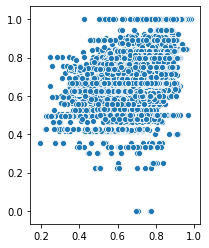

In [43]:
trainer.evaluate_model()

In [44]:
seq_size = config.sequence_size
dummy_template = [[0]*i + [1]*(seq_size - i) for i in range(seq_size)]
dummy_template

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

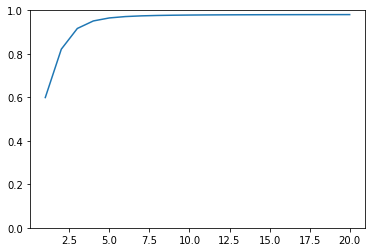

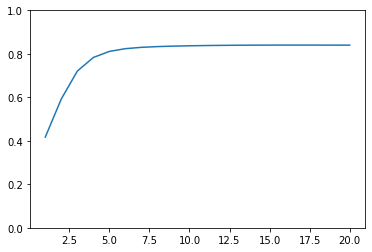

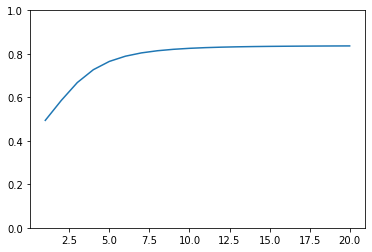

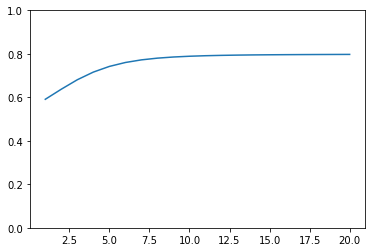

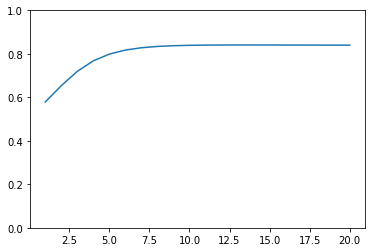

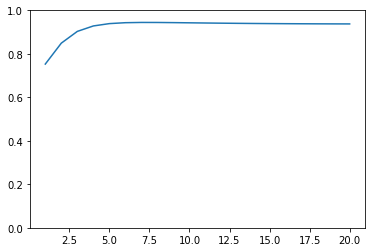

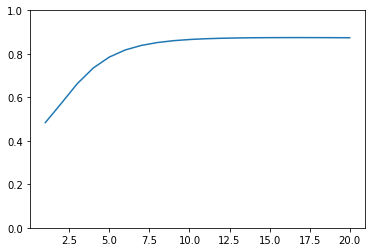

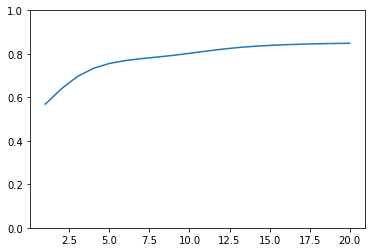

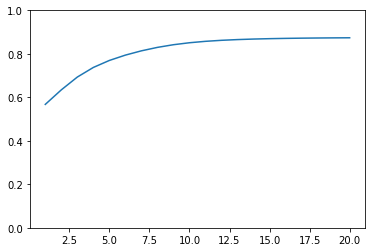

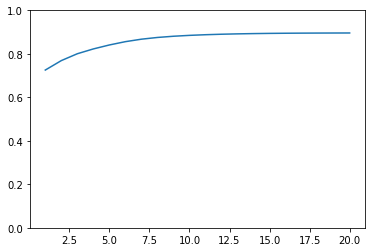

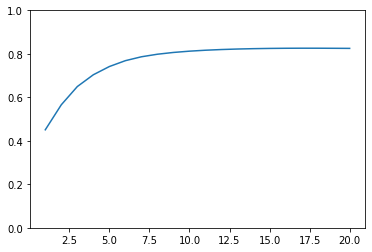

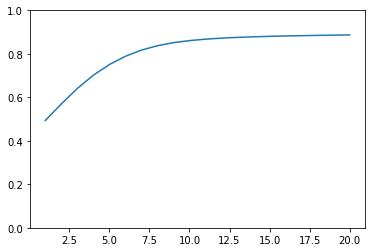

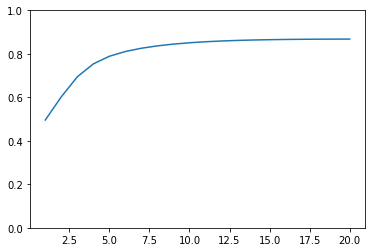

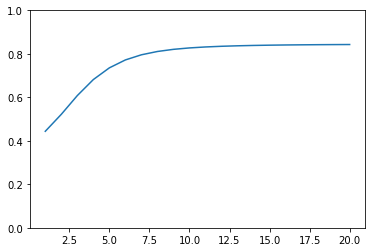

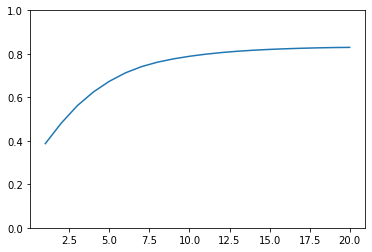

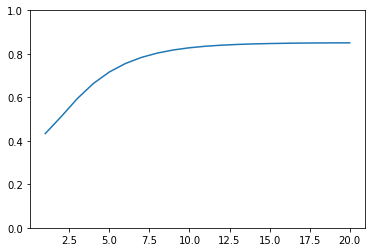

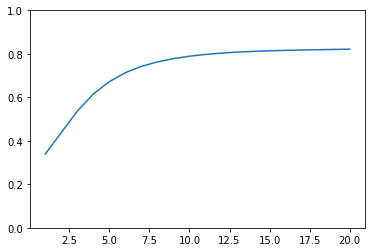

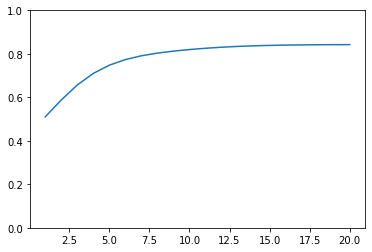

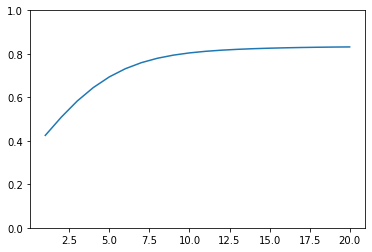

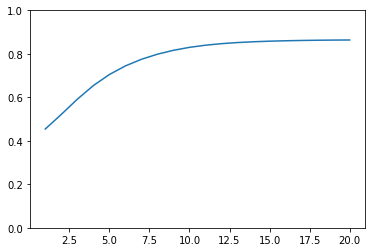

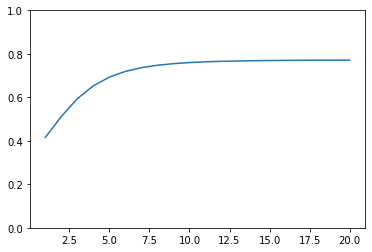

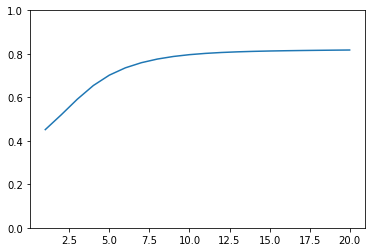

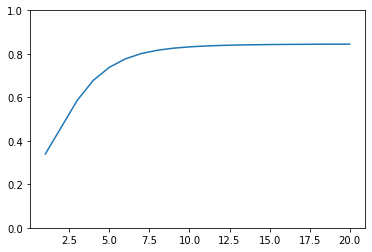

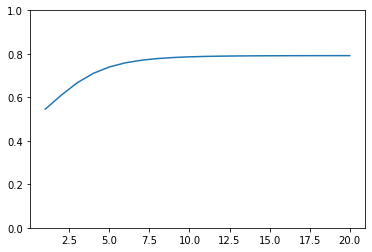

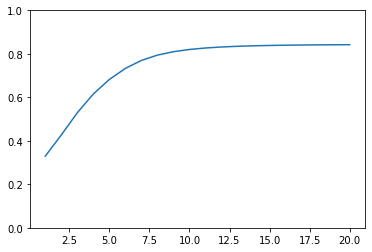

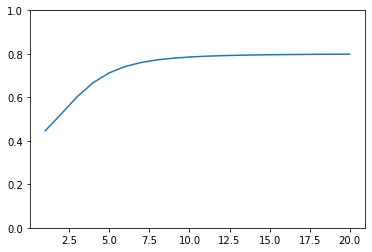

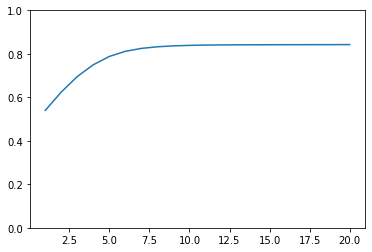

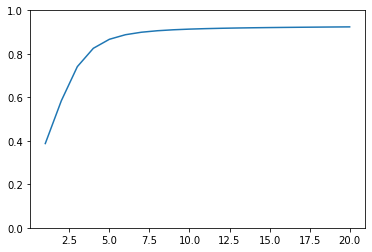

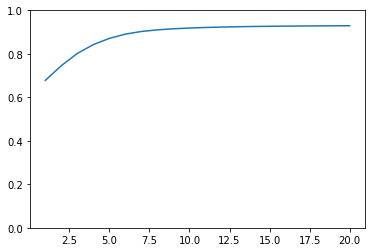

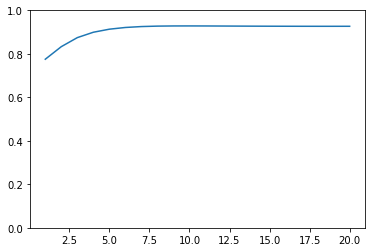

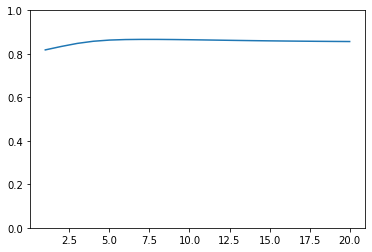

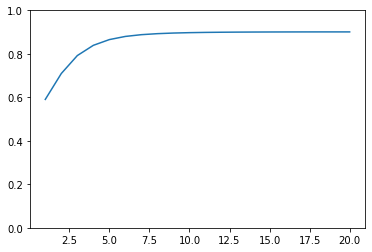

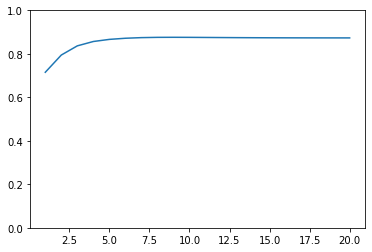

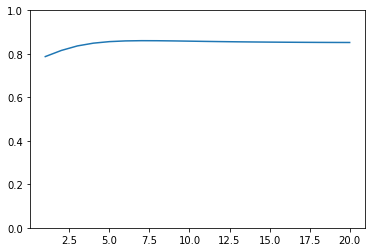

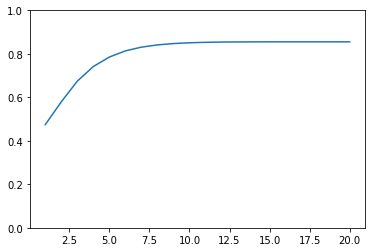

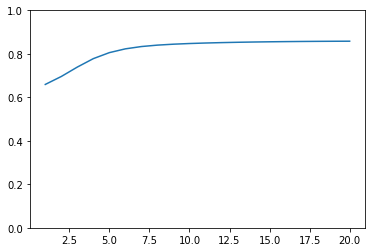

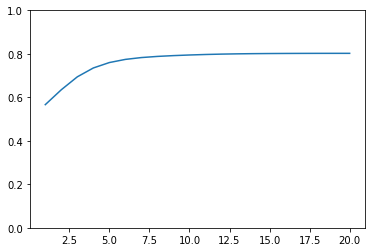

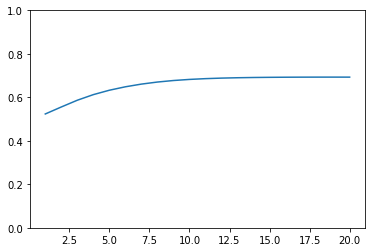

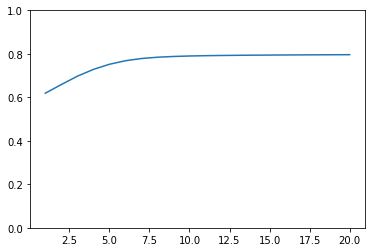

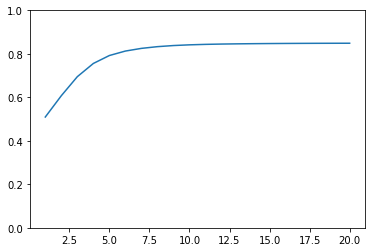

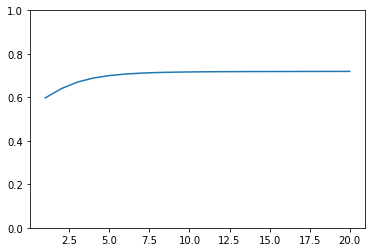

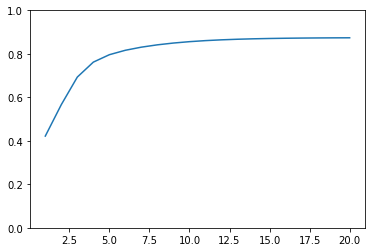

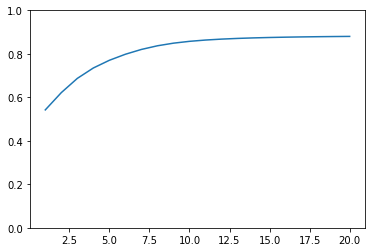

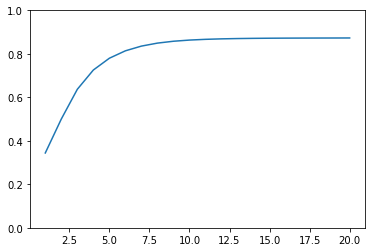

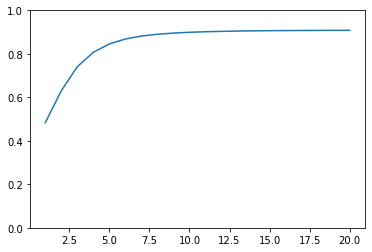

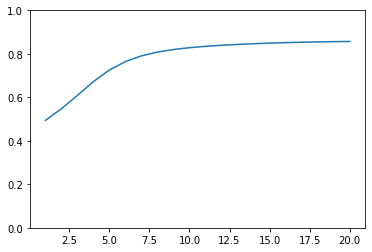

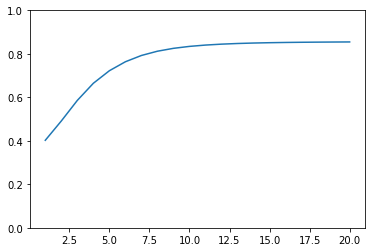

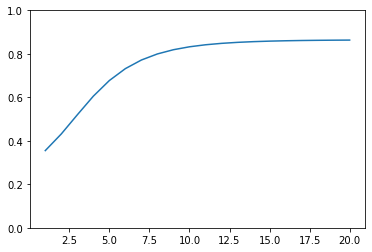

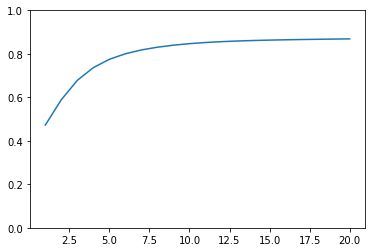

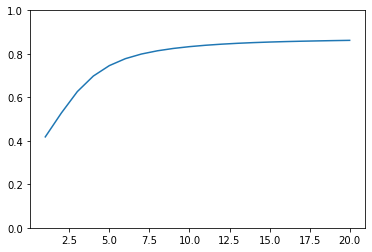

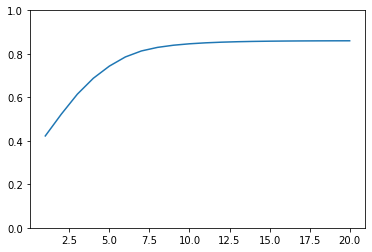

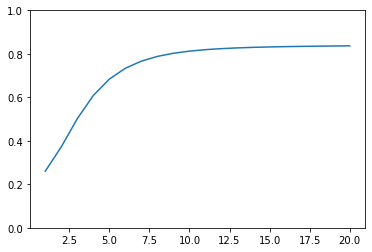

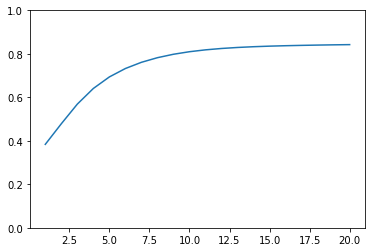

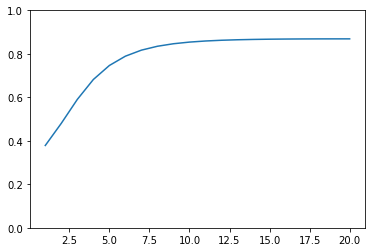

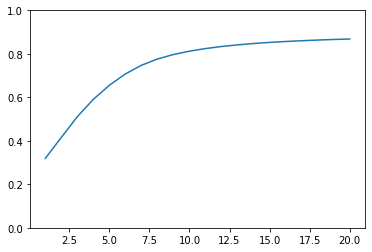

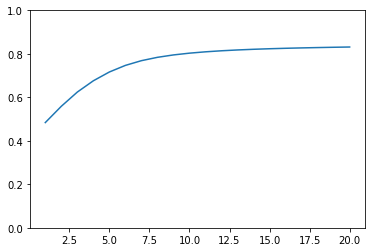

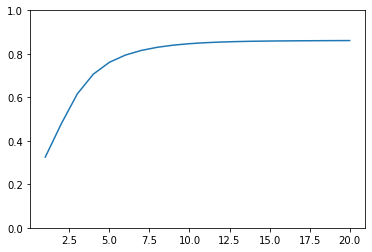

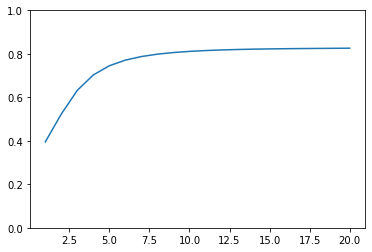

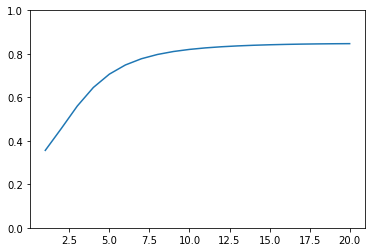

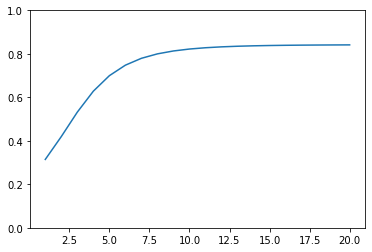

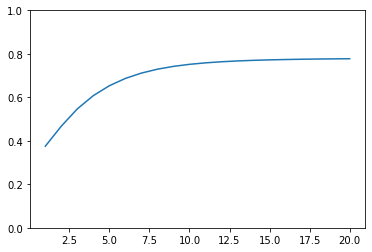

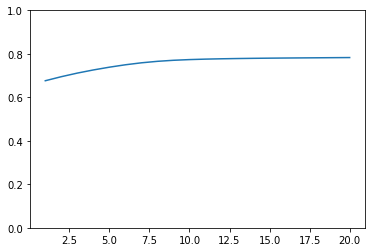

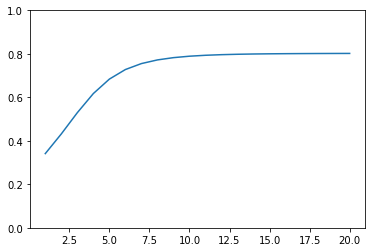

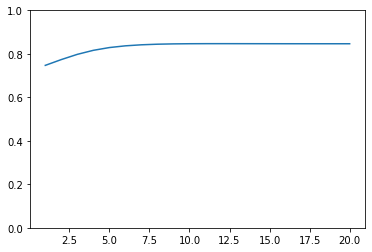

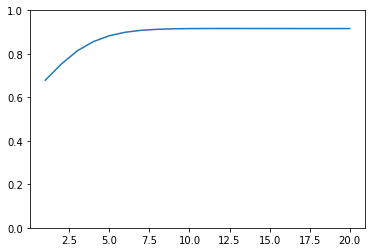

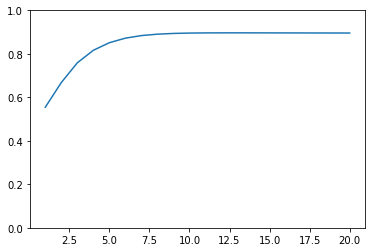

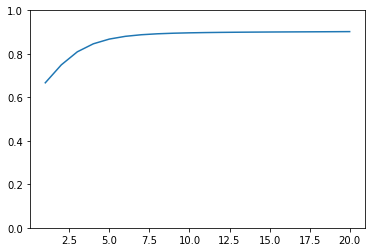

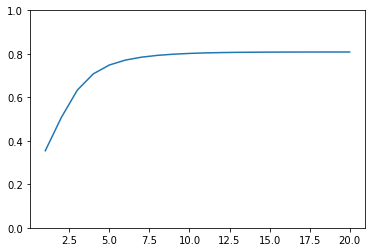

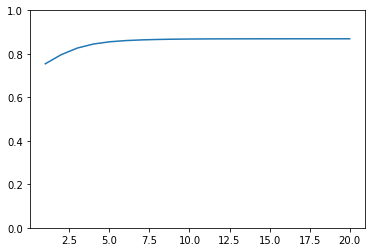

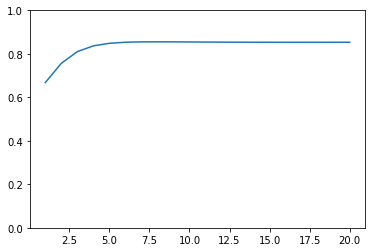

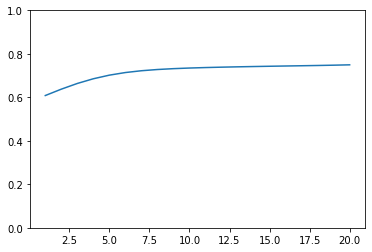

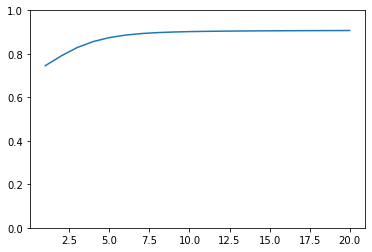

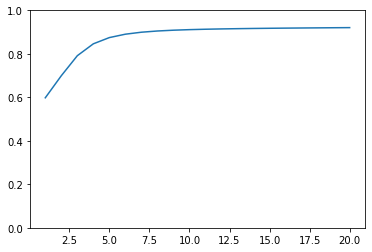

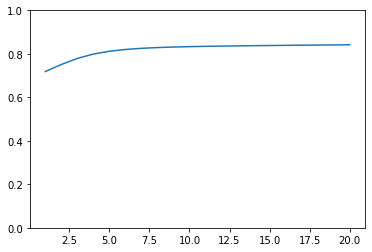

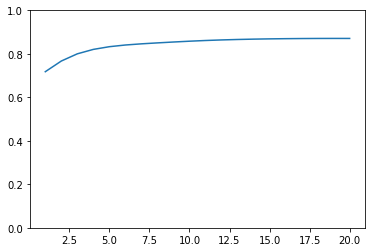

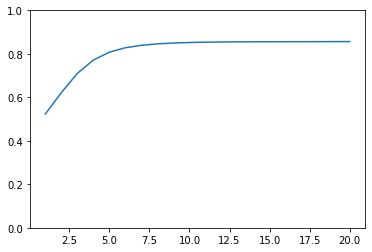

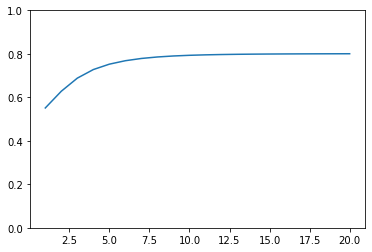

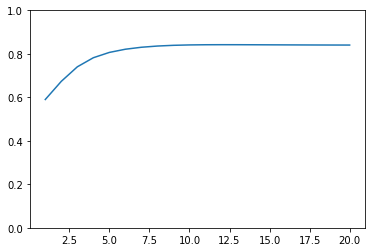

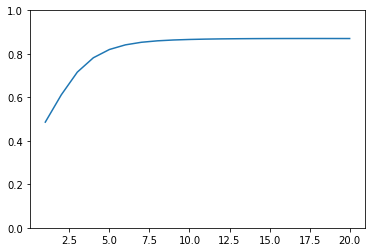

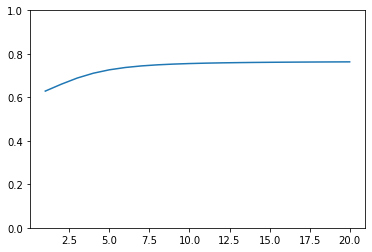

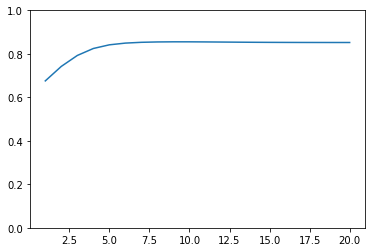

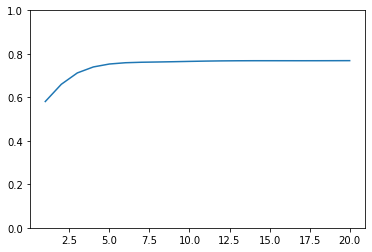

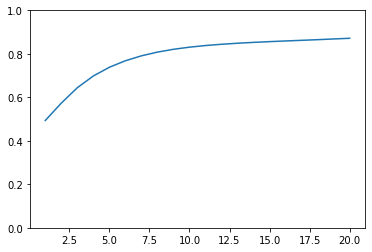

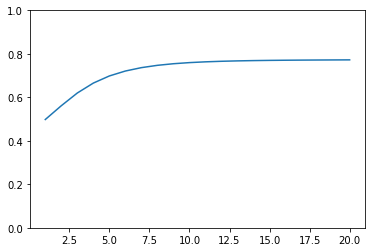

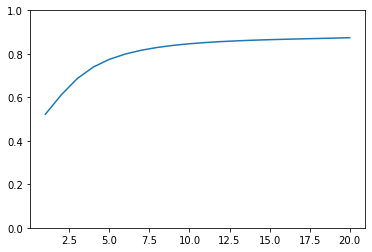

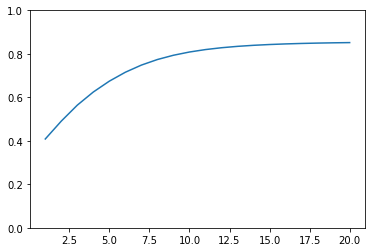

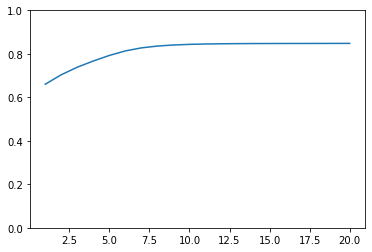

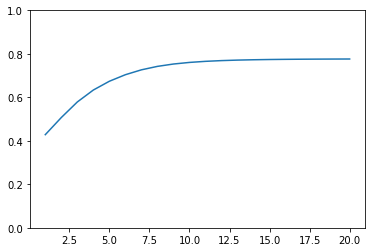

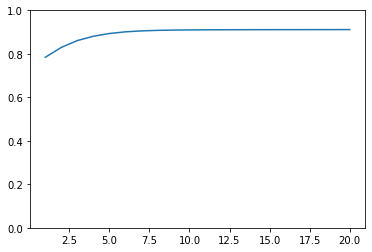

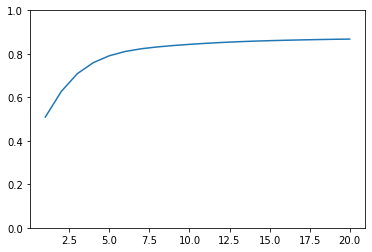

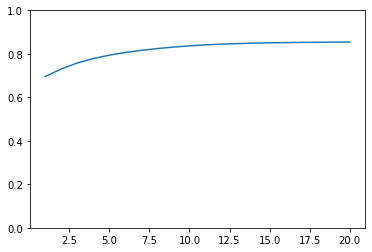

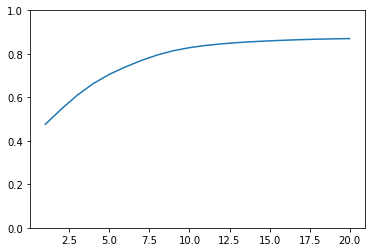

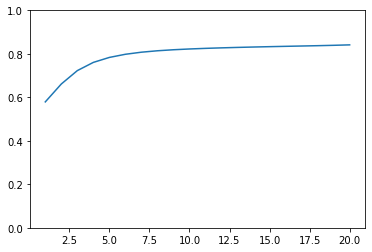

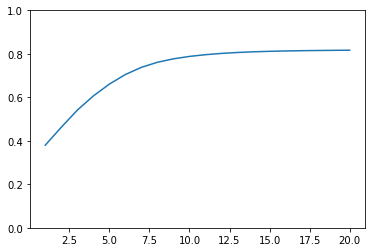

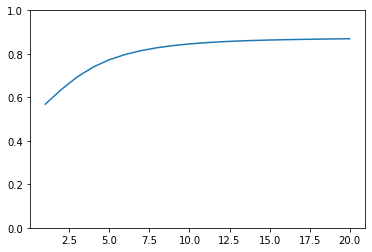

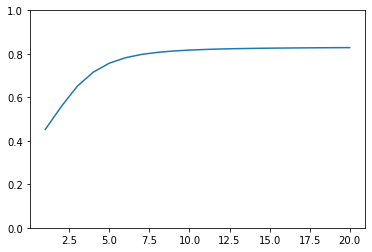

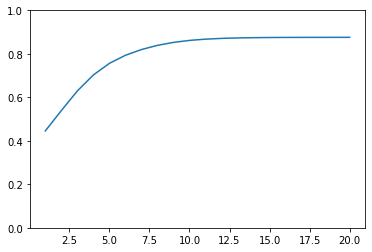

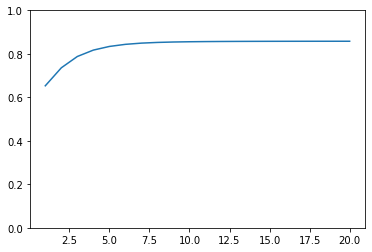

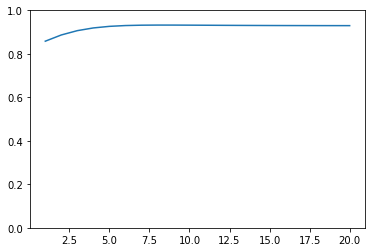

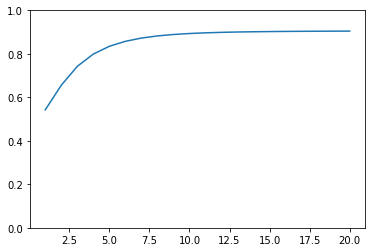

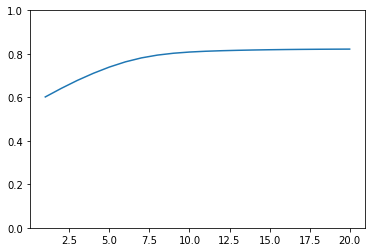

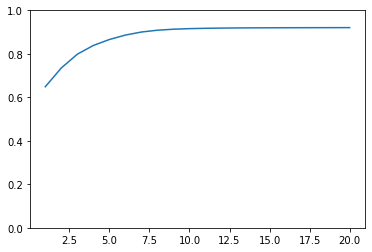

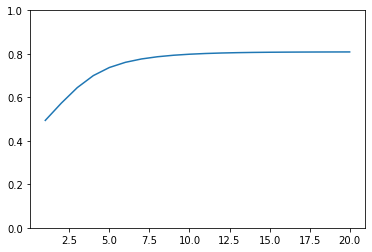

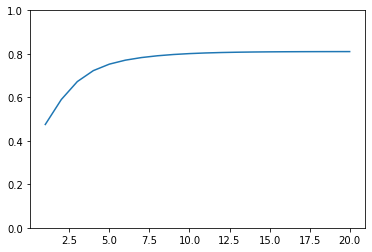

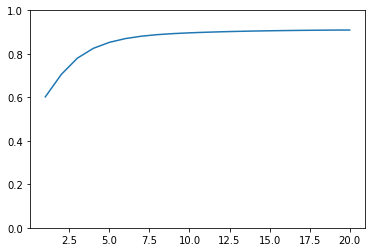

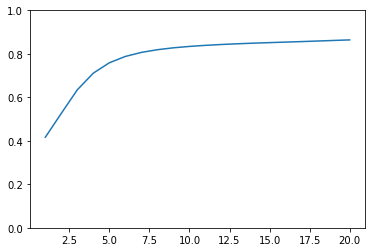

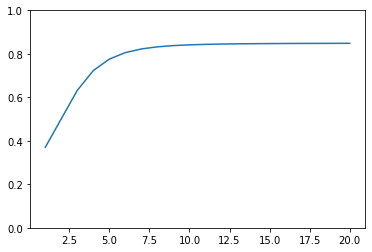

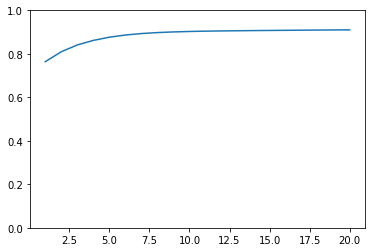

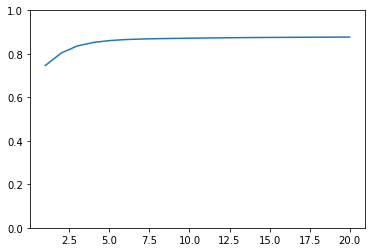

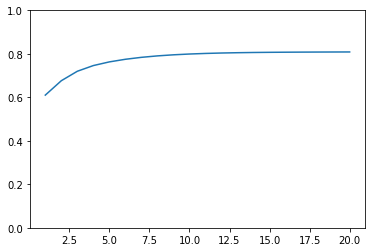

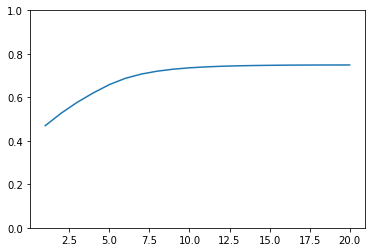

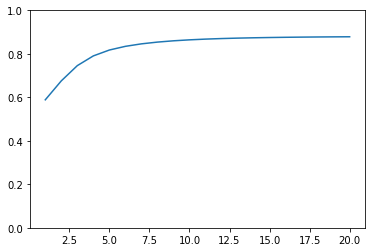

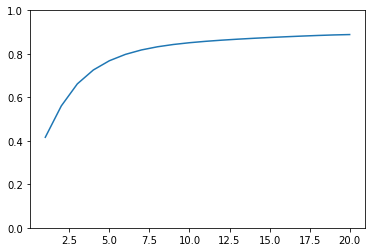

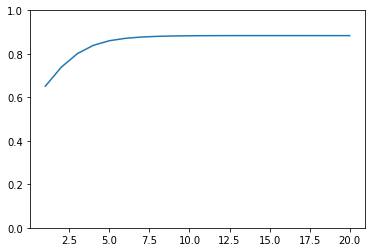

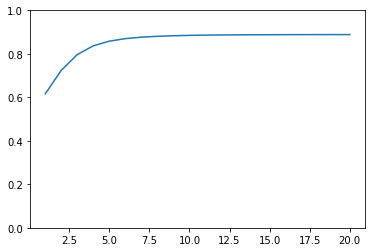

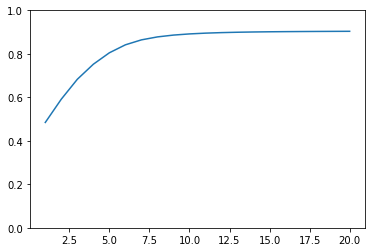

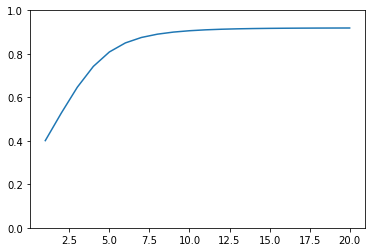

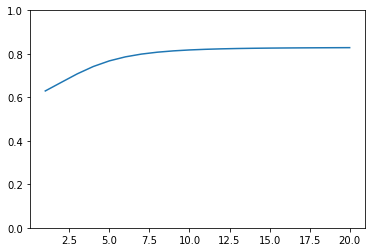

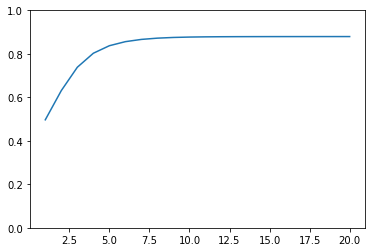

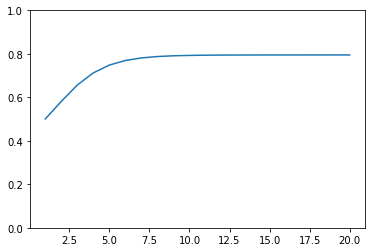

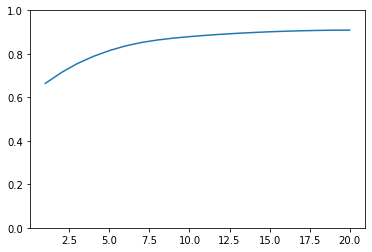

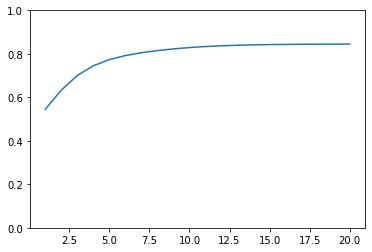

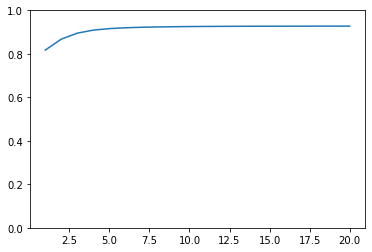

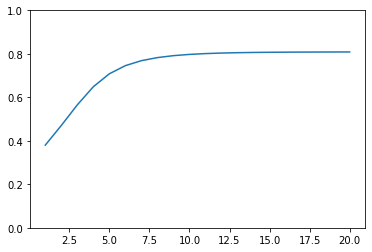

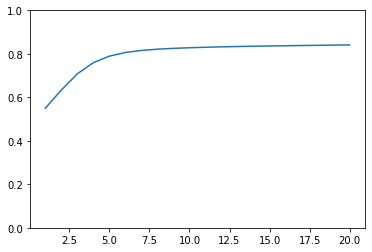

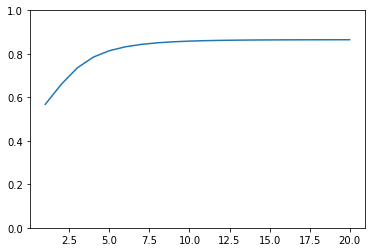

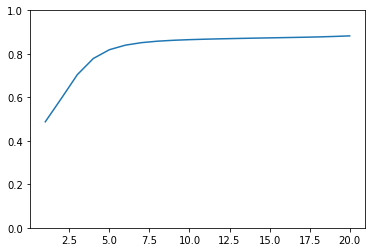

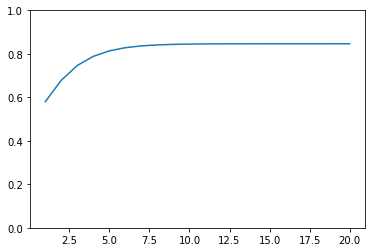

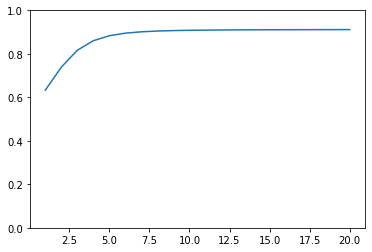

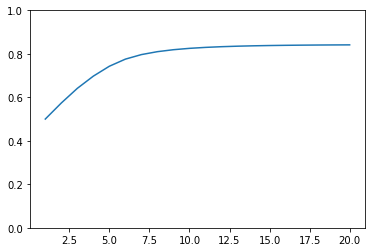

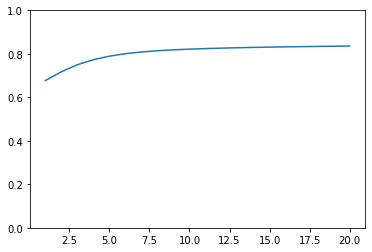

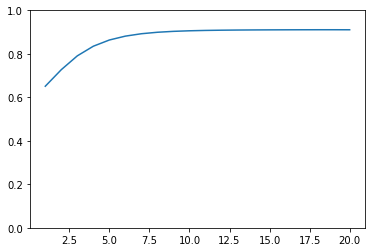

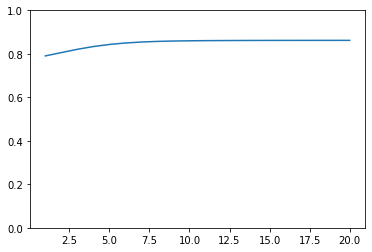

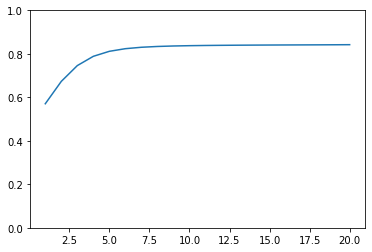

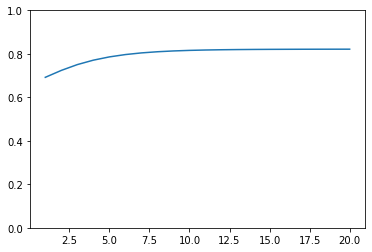

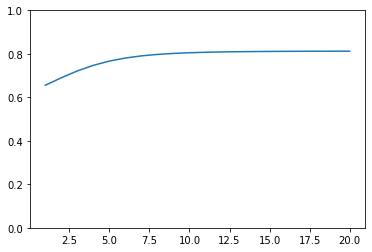

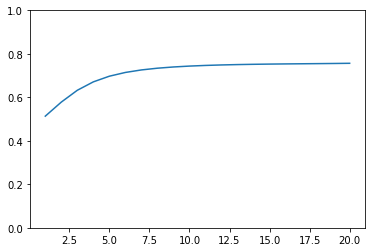

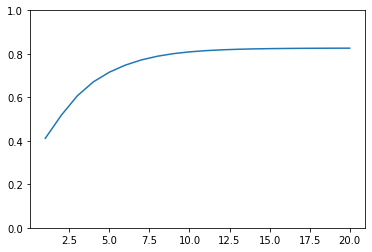

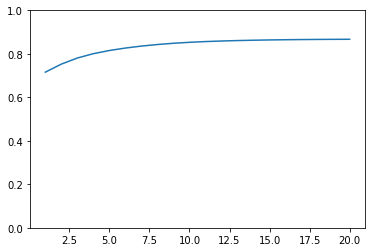

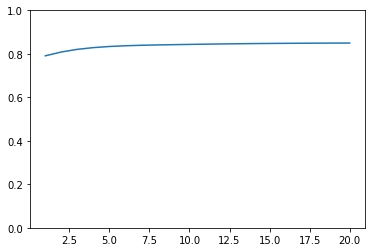

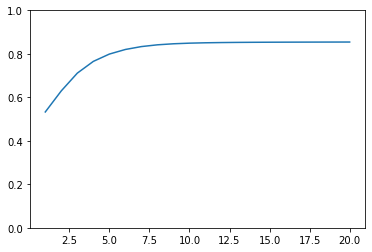

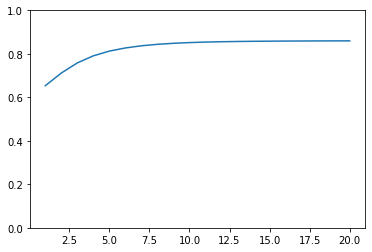

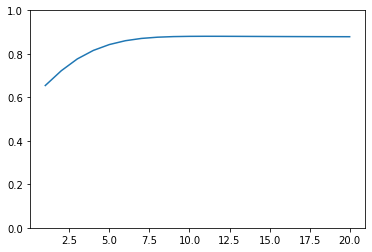

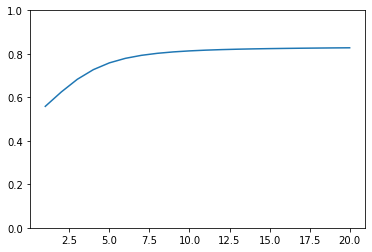

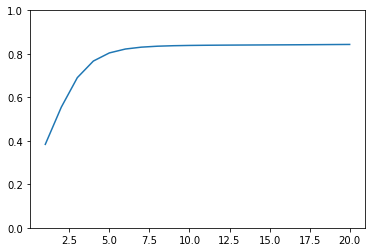

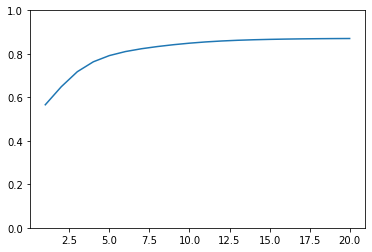

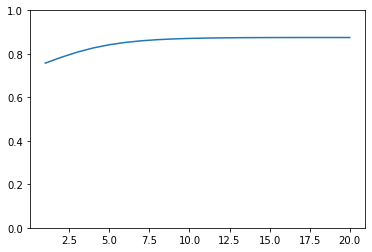

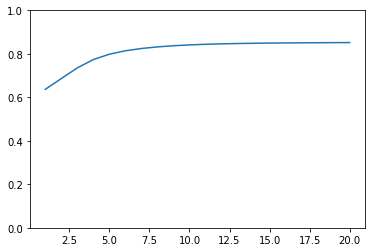

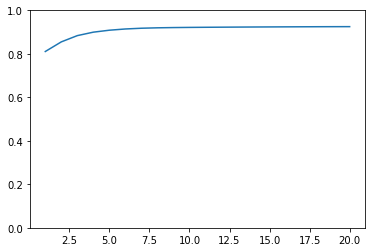

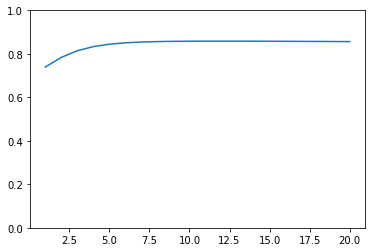

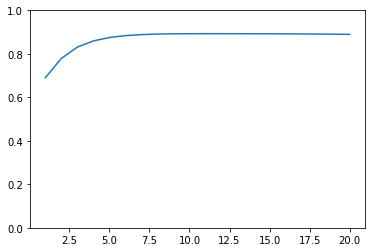

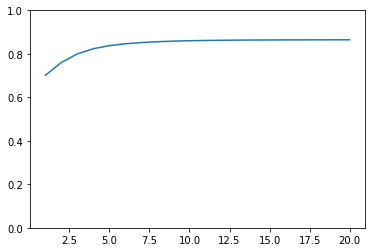

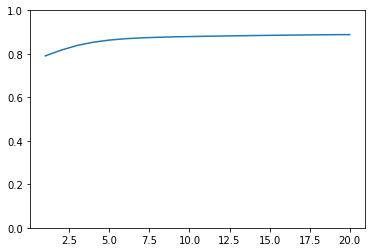

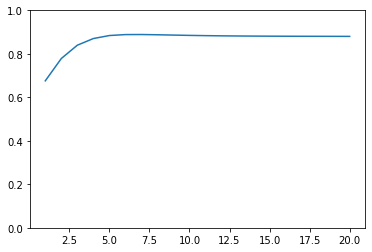

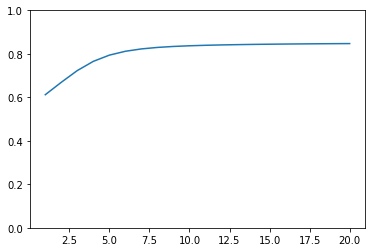

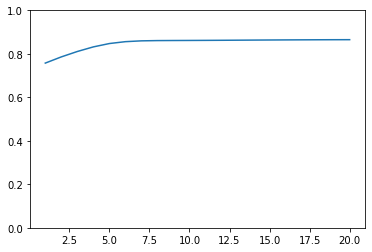

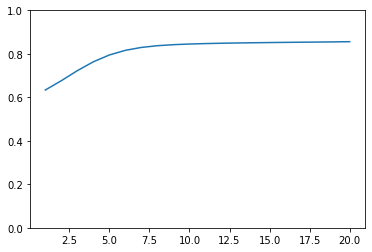

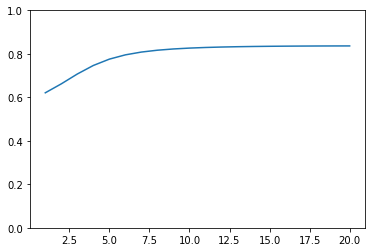

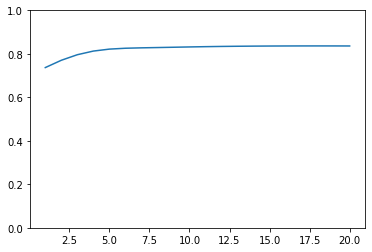

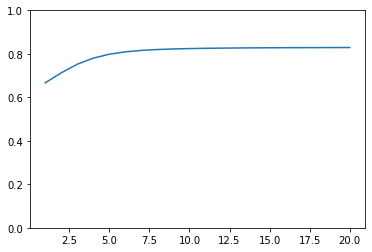

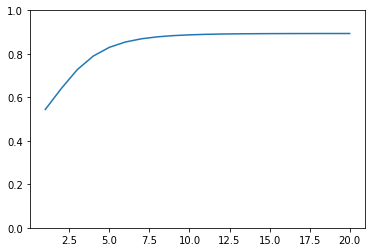

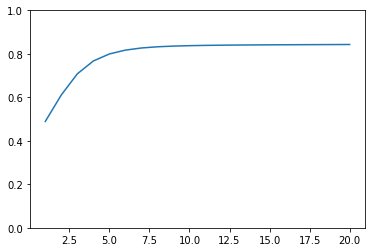

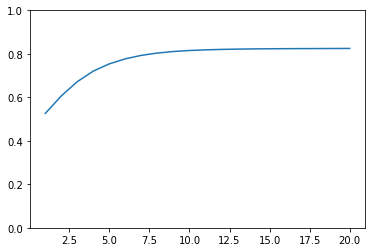

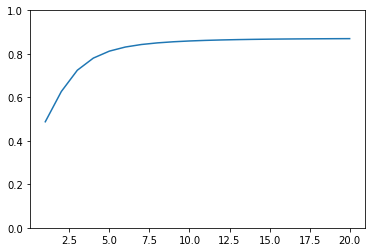

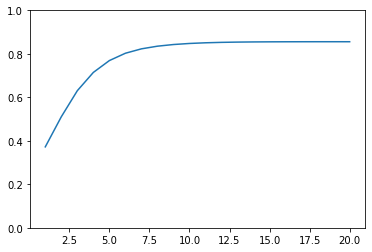

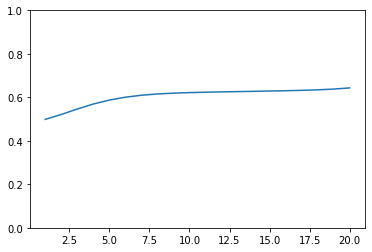

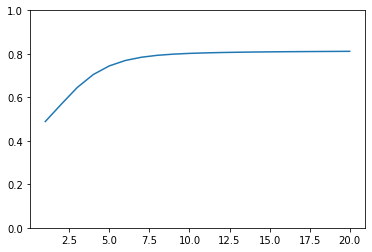

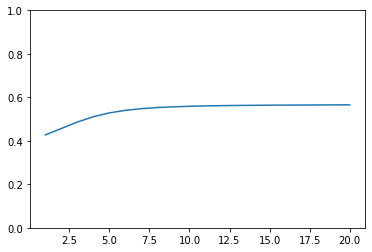

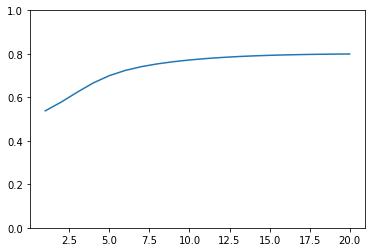

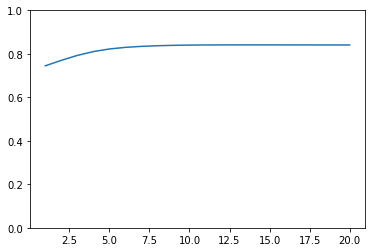

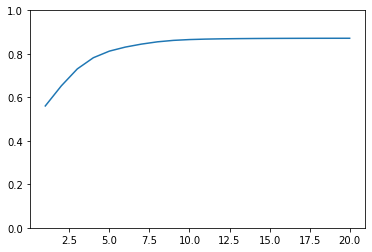

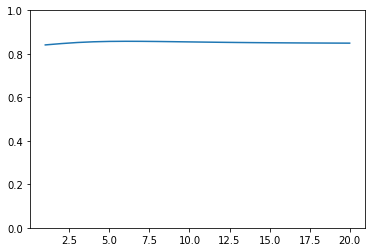

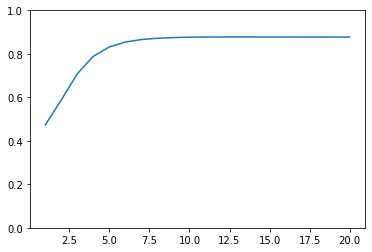

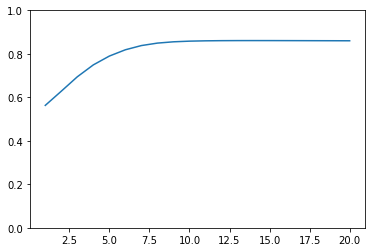

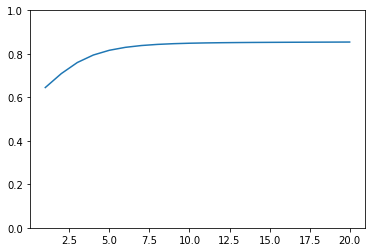

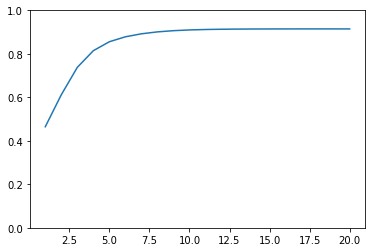

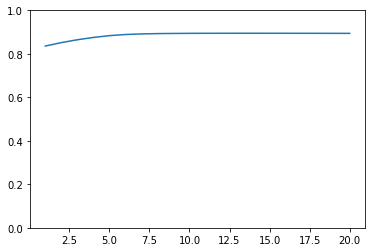

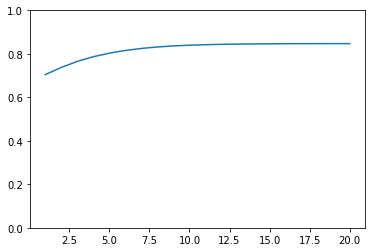

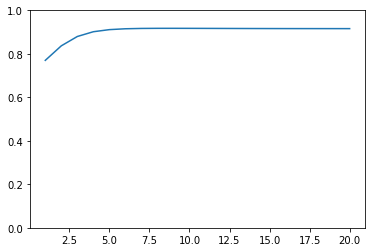

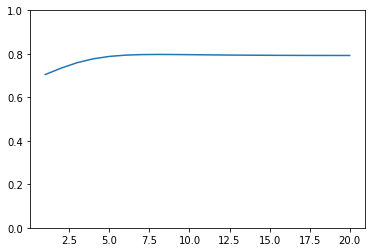

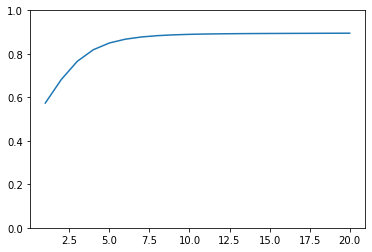

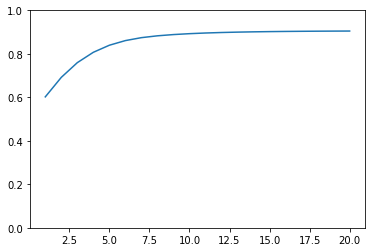

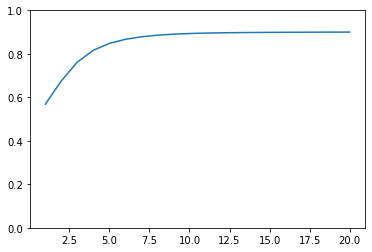

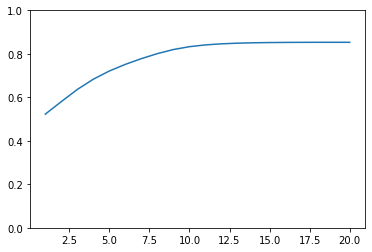

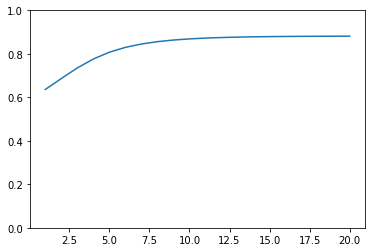

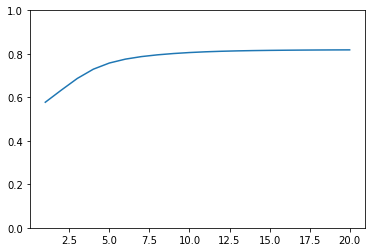

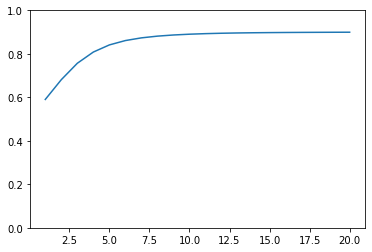

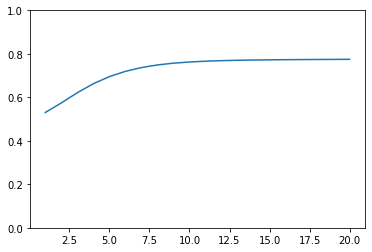

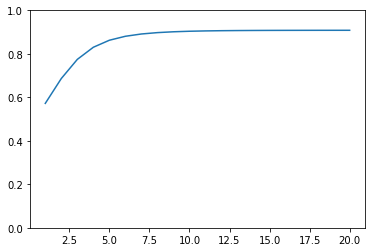

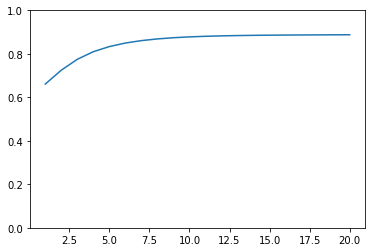

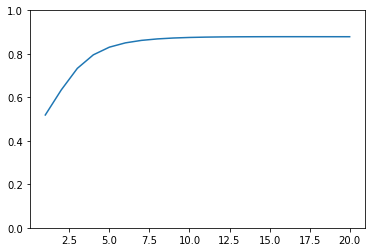

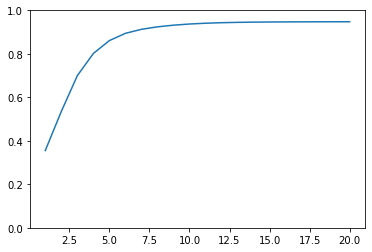

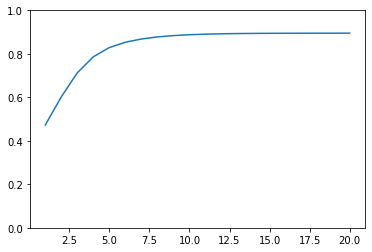

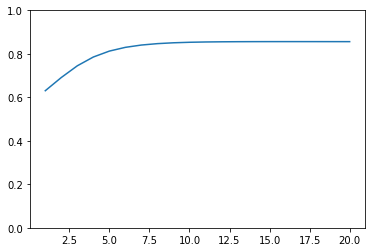

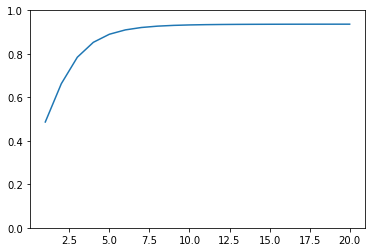

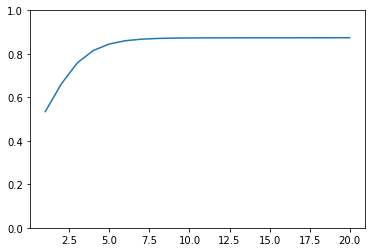

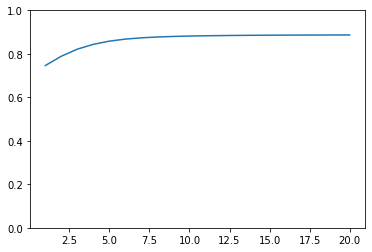

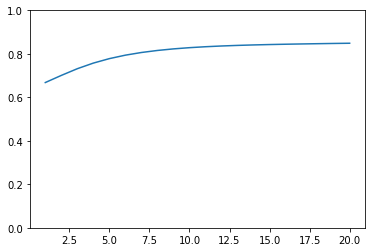

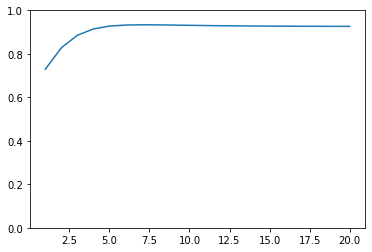

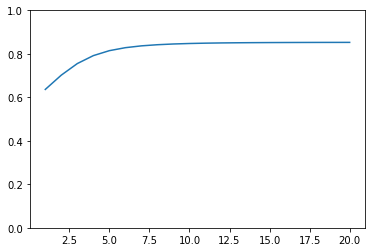

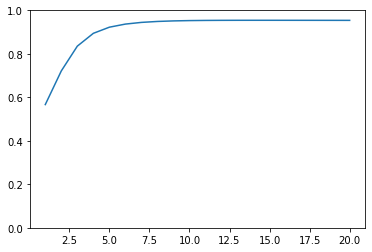

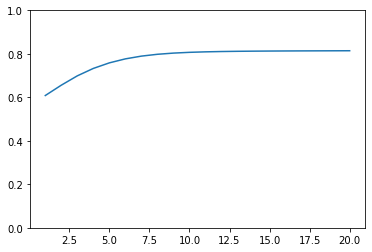

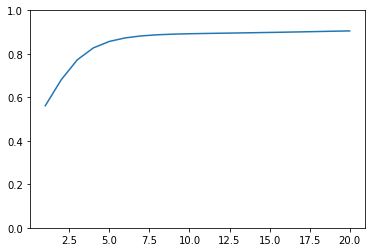

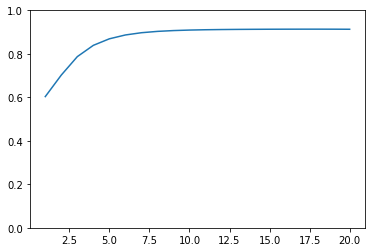

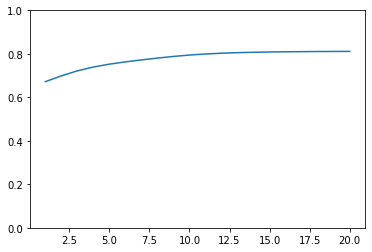

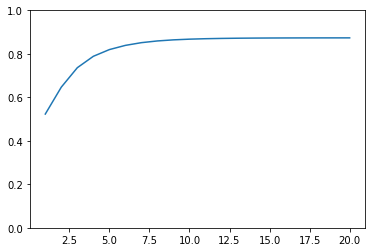

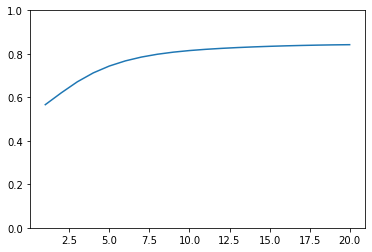

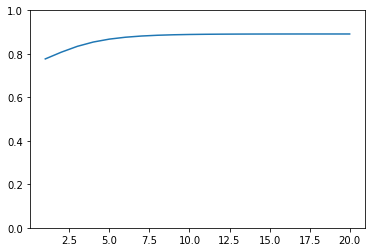

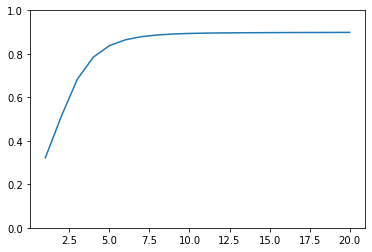

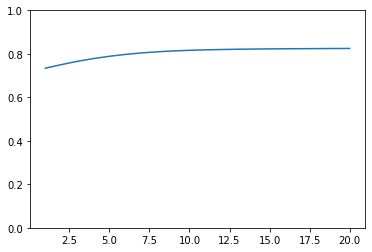

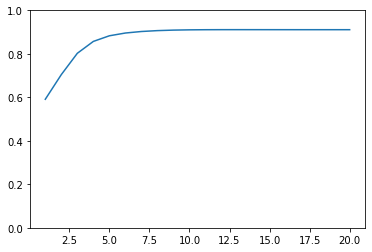

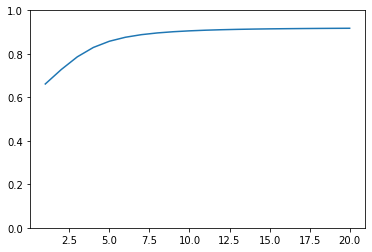

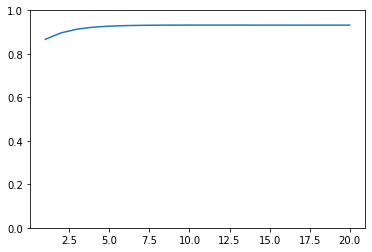

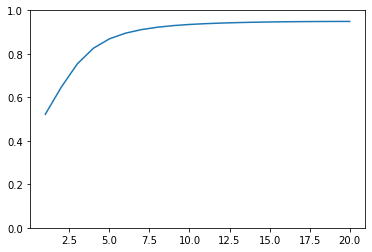

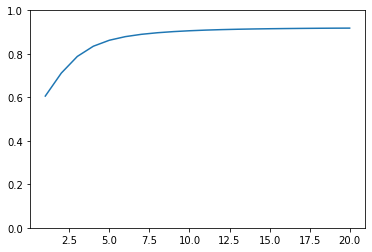

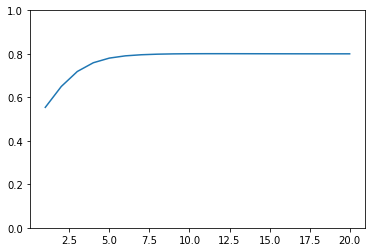

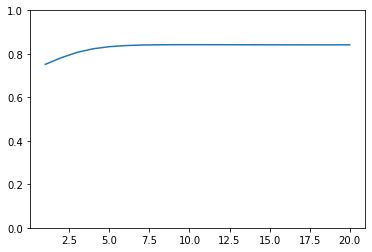

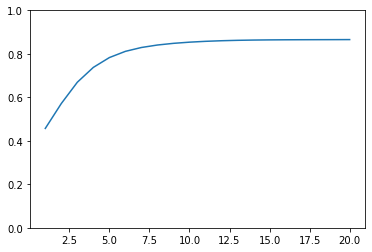

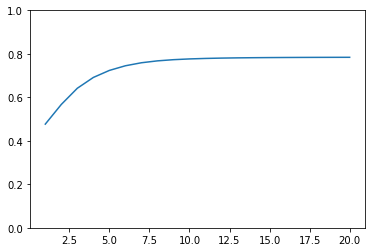

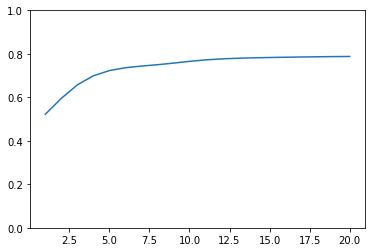

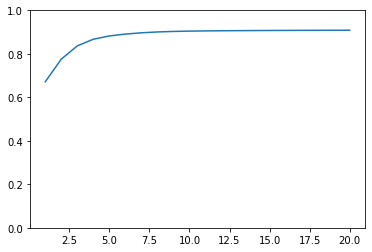

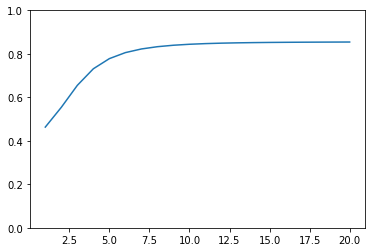

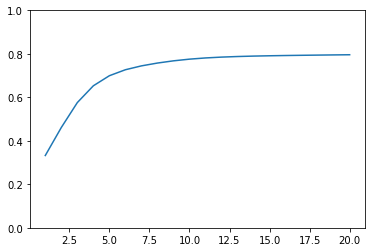

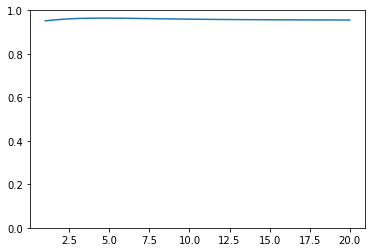

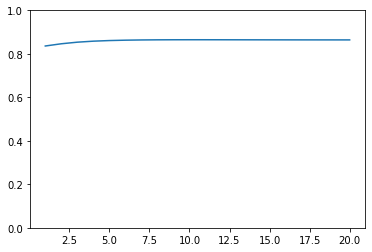

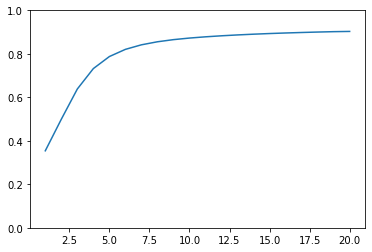

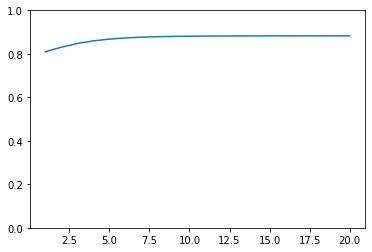

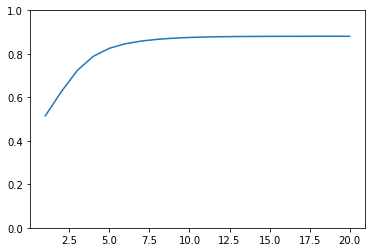

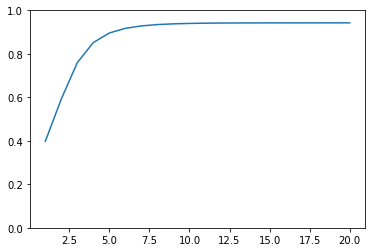

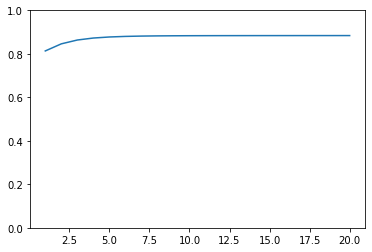

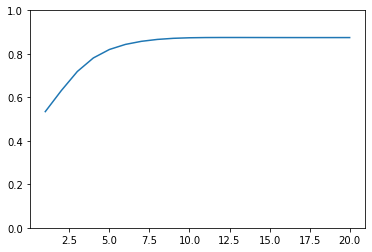

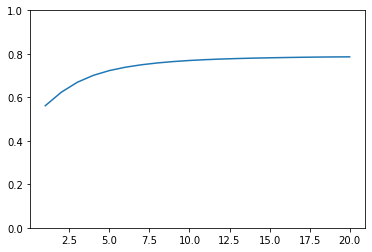

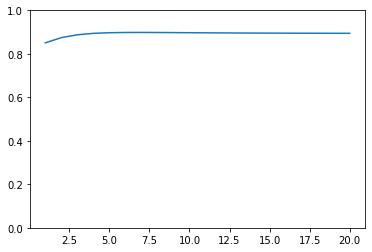

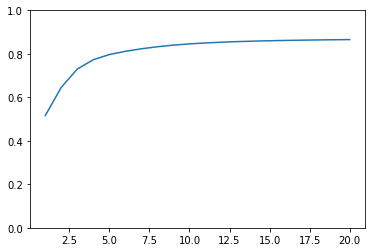

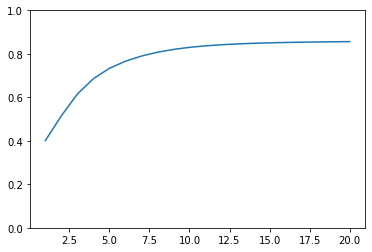

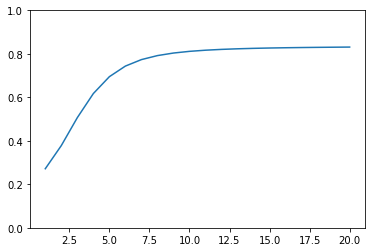

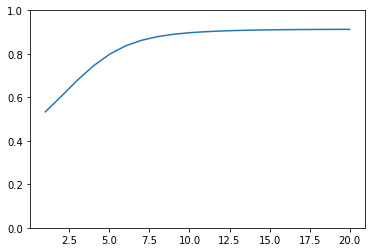

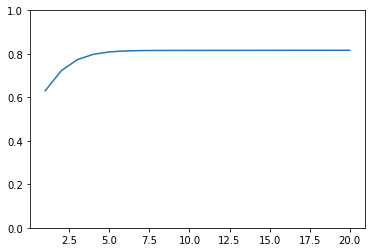

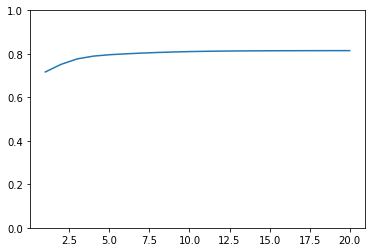

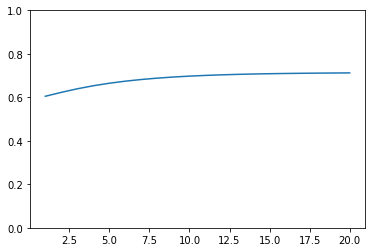

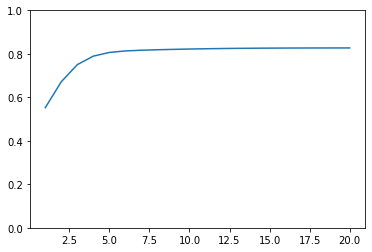

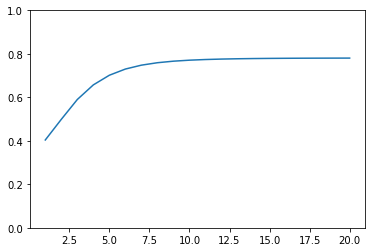

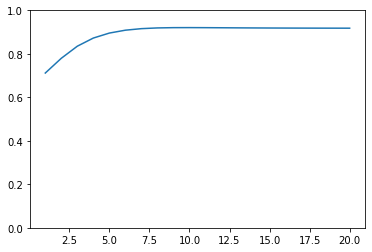

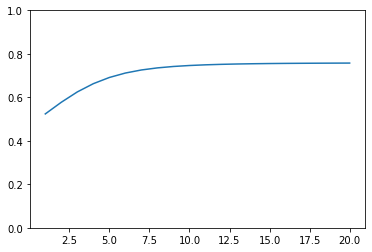

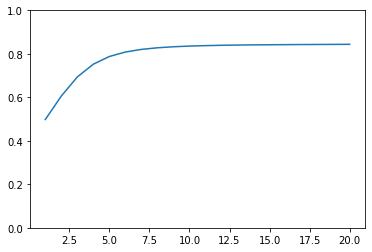

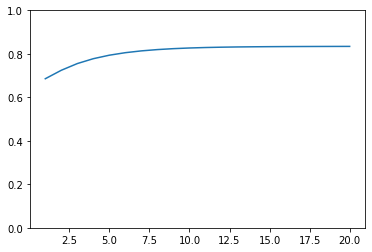

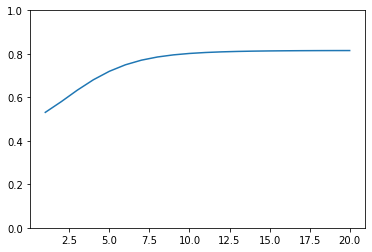

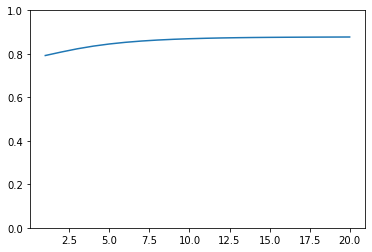

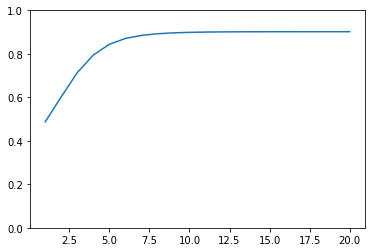

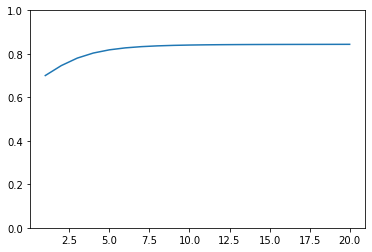

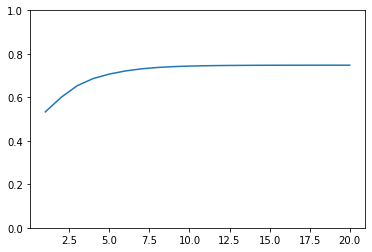

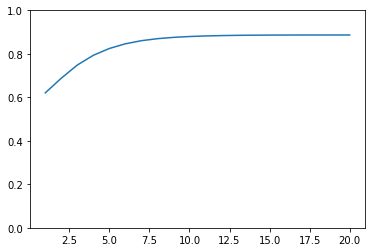

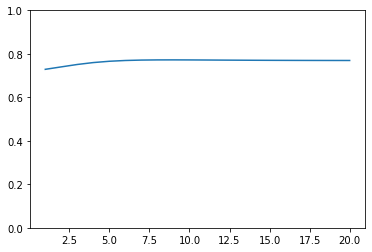

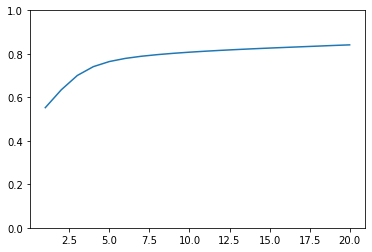

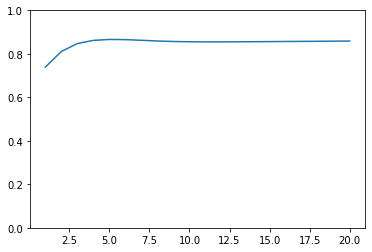

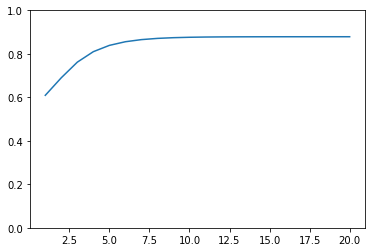

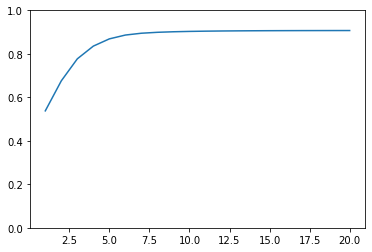

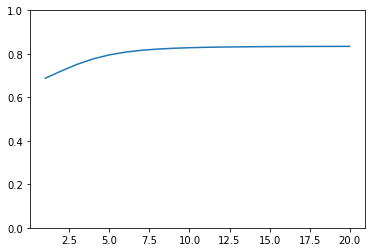

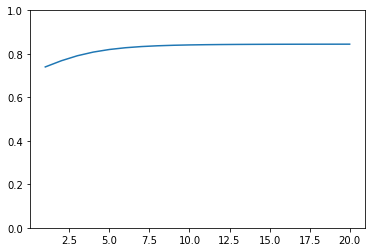

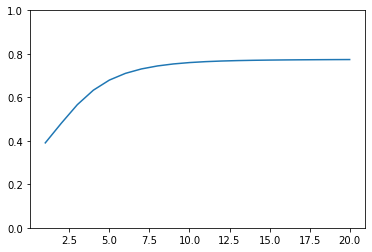

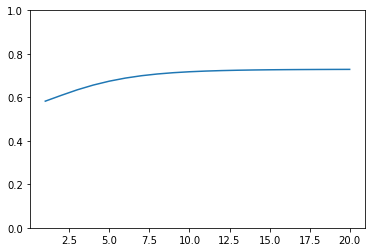

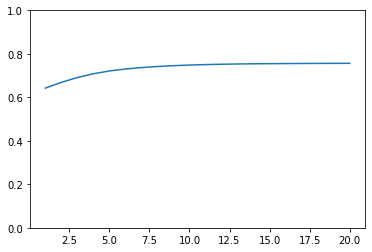

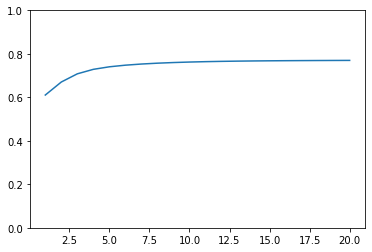

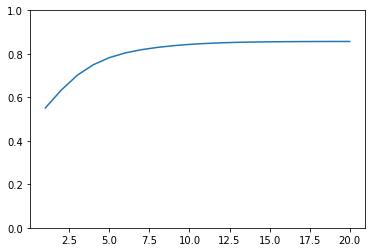

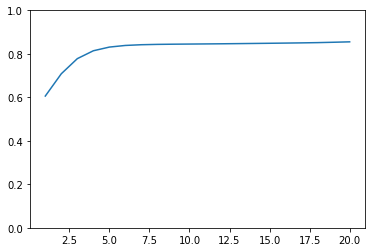

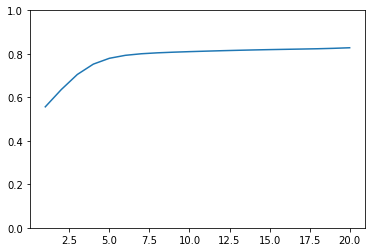

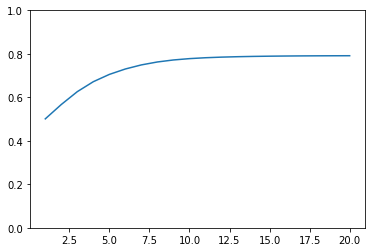

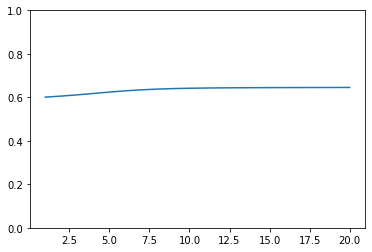

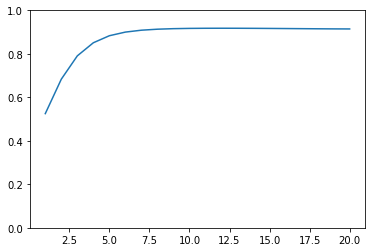

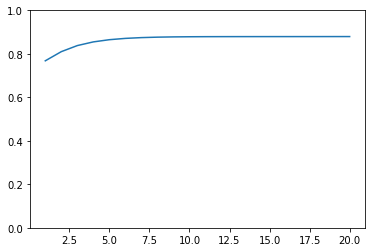

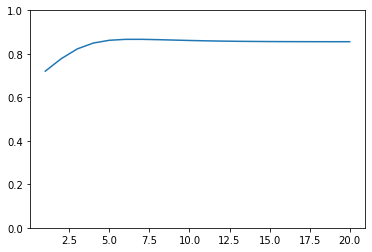

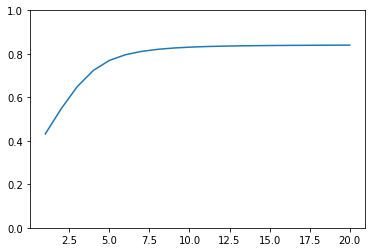

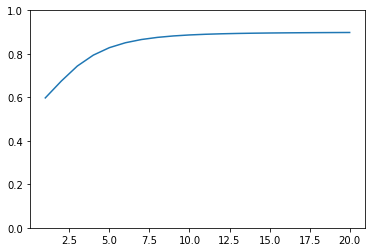

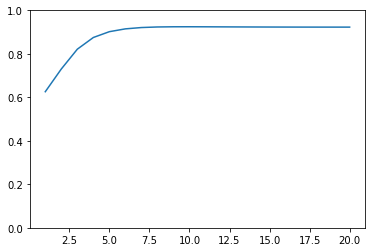

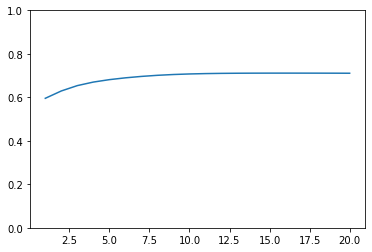

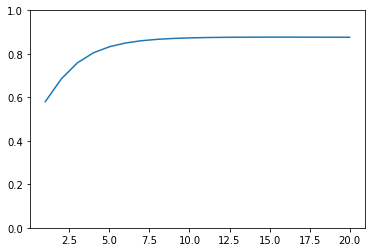

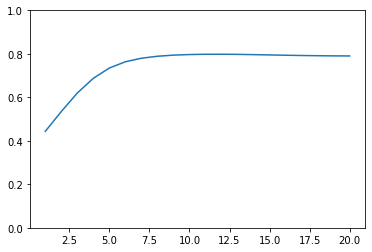

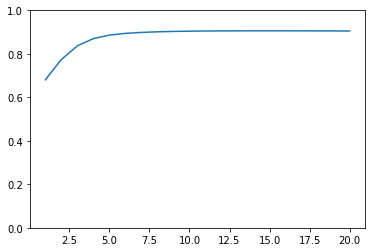

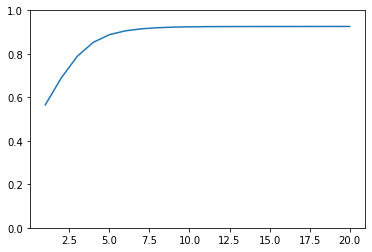

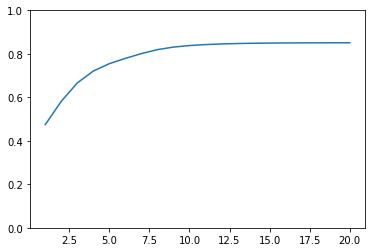

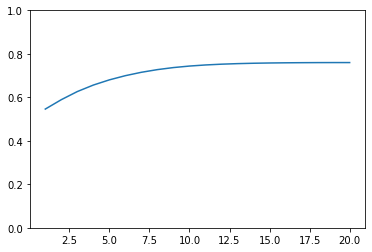

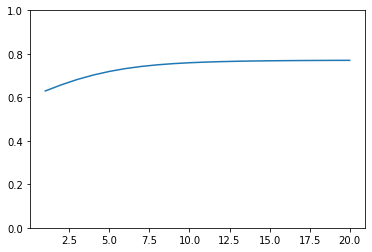

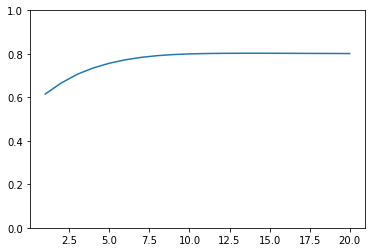

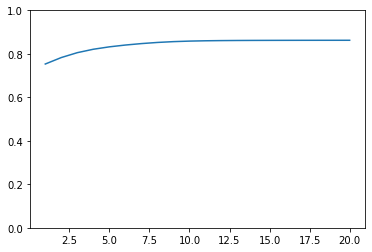

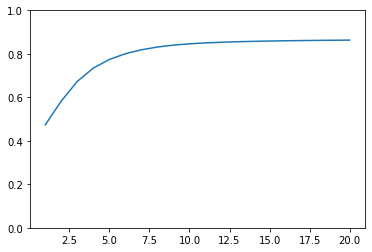

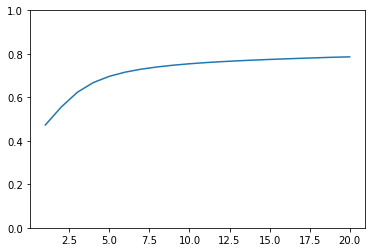

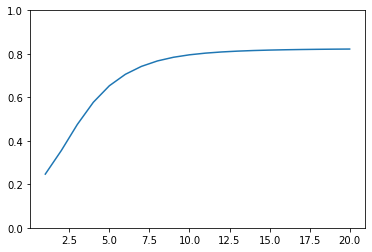

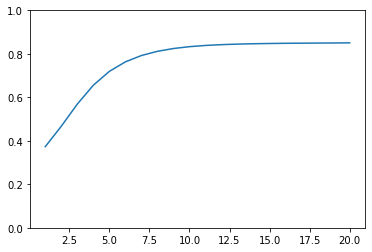

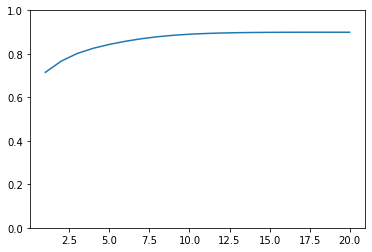

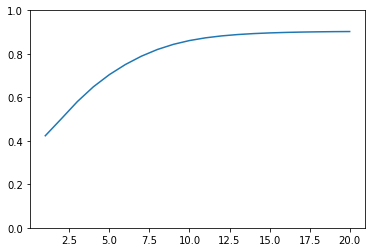

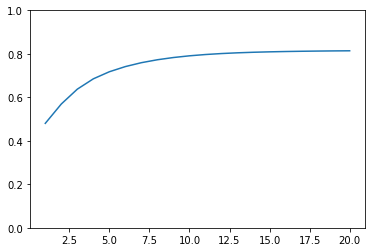

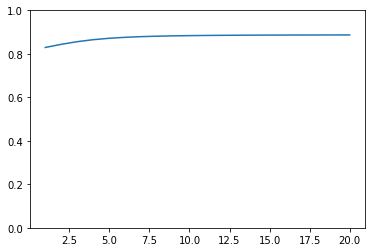

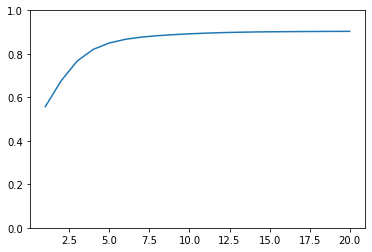

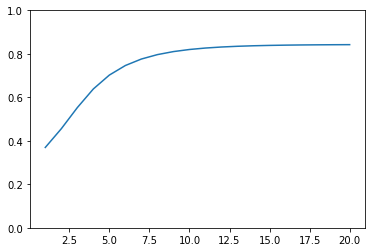

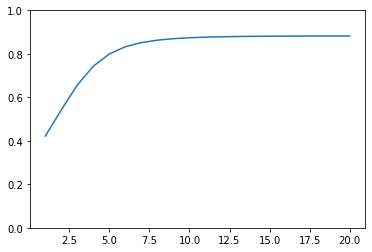

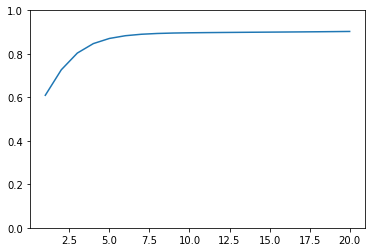

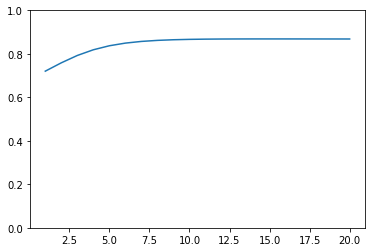

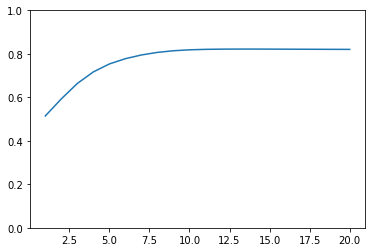

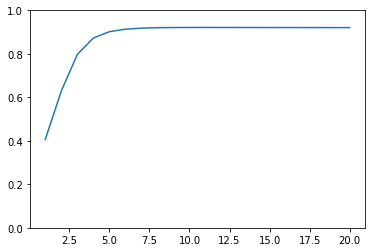

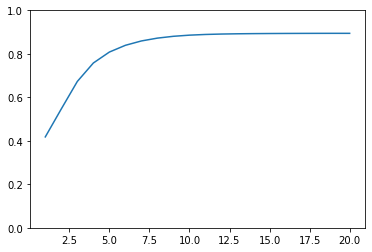

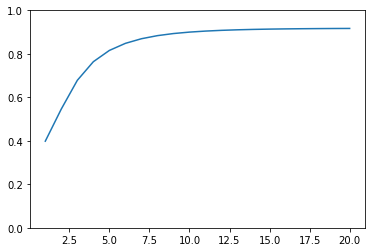

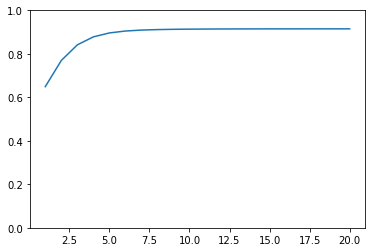

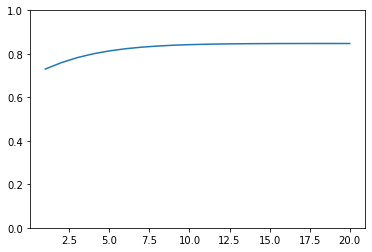

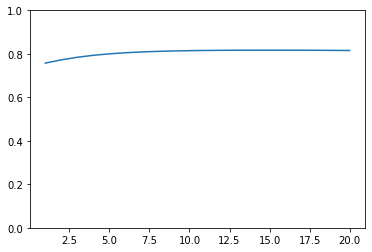

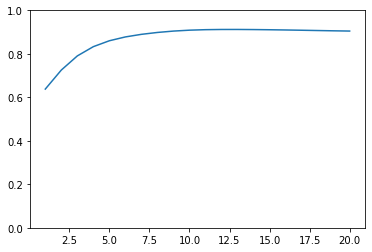

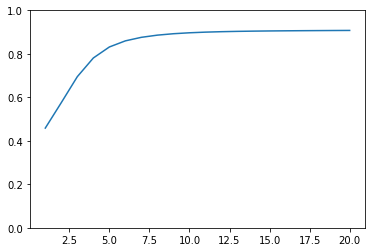

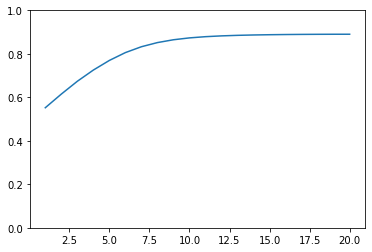

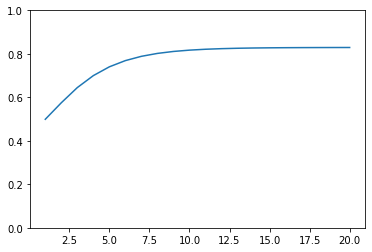

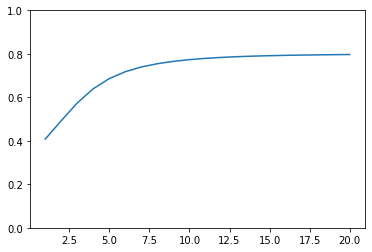

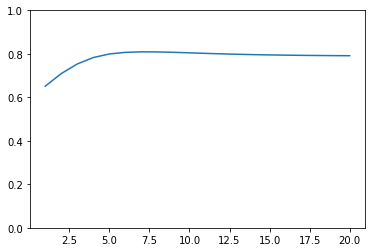

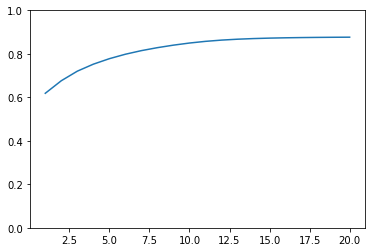

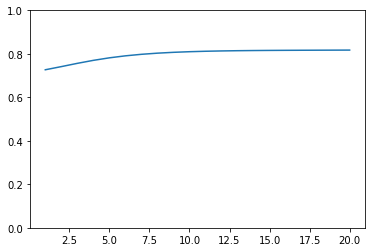

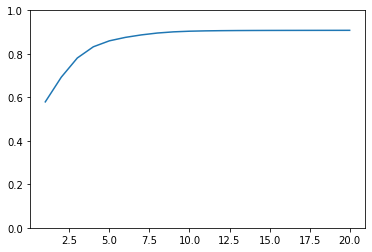

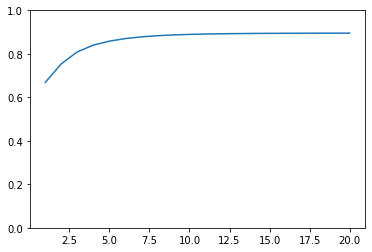

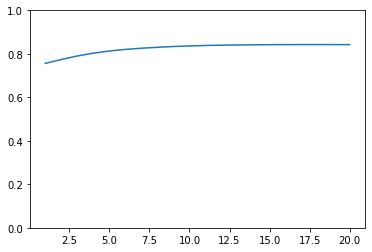

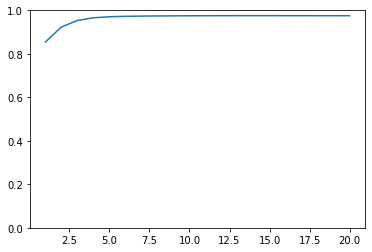

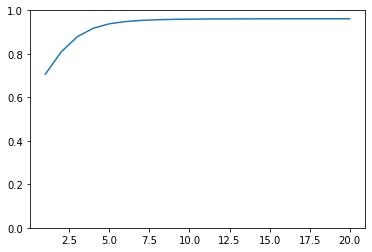

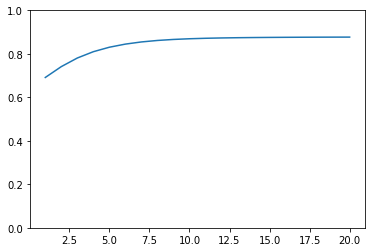

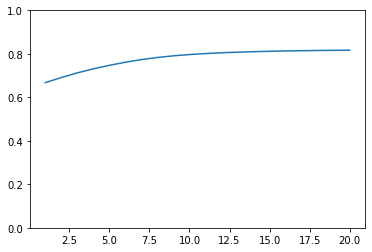

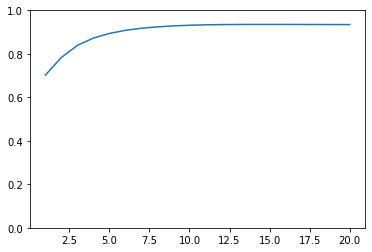

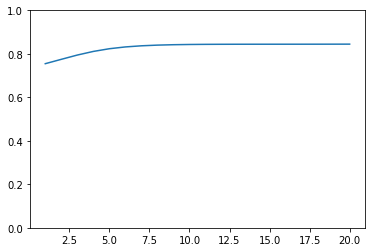

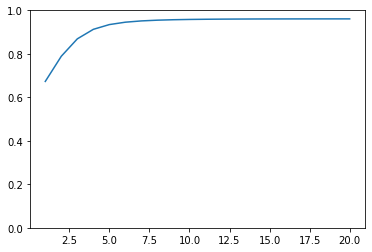

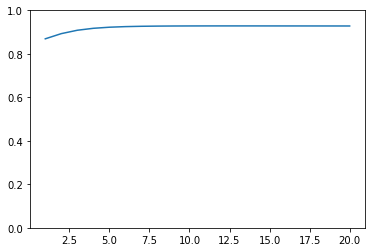

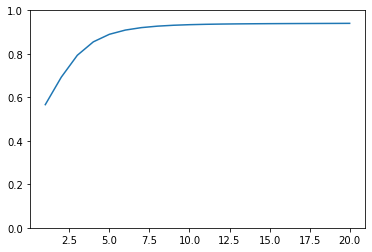

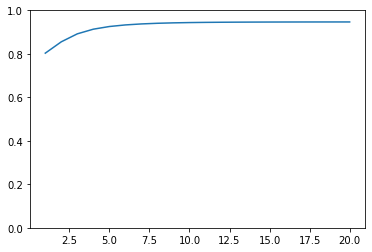

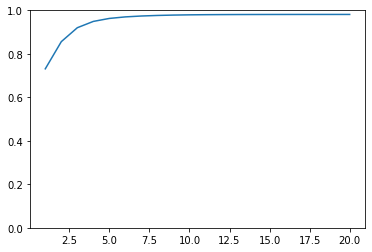

In [46]:
for v in problems_dic.values():
    # wrong
    simu = dummy_template
    preds = []
    for s in simu:
        res = trainer.model.loss_batch(torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                            torch.Tensor([(v,a) for a in s]).unsqueeze(0))
        preds.append(res['pred_prob'][-1].item())
    plt.ylim(0, 1)
    sns.lineplot([sum(s) for s in simu], preds)
    plt.show()

# ASSISTments 2009-2010

### DKT baseline

In [48]:
config_dic = {
    "debug": False,
    "cuda": True,
    "model_name": "ksdkt",
    "load_model": "output/1220_gt_all_assistment2009/dkt/checkpoints/20191220-2209/ksdkt_auc0.8481_e800.model",
    "source_data": "original_ASSISTmentsSkillBuilder0910",
    "n_skills": 124,
    "sequence_size": 20,
    "epoch_size": 1000,
    "pre_dummy_epoch_size": 0,
    "batch_size": 100,
    "lr": 0.05,
    "waviness_l1": True,
    "waviness_l2": True,
    "lambda_l1": 0.0,
    "lambda_l2": 0.0,
    "ksvector_l1": 0.0,
    "eddkt": {
      "ks_loss": False,
      "extend_backward": 0,
      "extend_forward": 15,
      "hidden_size": 200,
      "n_layers": 2,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "dkt": {
      "batch_size": 100,
      "hidden_size": 200,
      "n_layers": 2,
      "bidirectional": False,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    }
}
config = Config(config_dic, projectdir)
config.batch_size = 1
trainer = Trainer(config)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 14513
INFO:ksdkt:eval_dl.dataset size: 3443
INFO:ksdkt:The model has 514,424 trainable parameters


In [49]:
seq_size = config.sequence_size
simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]

simu_res_dic = dict()
for v in range(config.n_skills):
    xs = []
    preds = []
    for s in simu:
        res = trainer.model.loss_batch(
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.Tensor([(v,a) for a in s]).unsqueeze(0))
        preds.append(res['pred_prob'][-1].item())
        xs.append(sum(s))
    simu_res_dic[v] = (xs, preds)


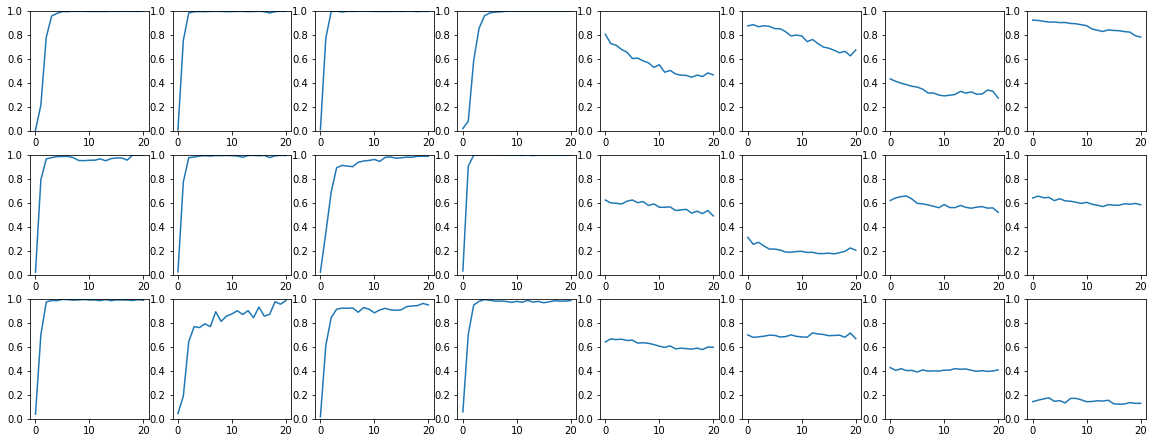

In [50]:
asce_simures = {k:v for k, v in sorted(simu_res_dic.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
desc_simures = {k:v for k, v in sorted(simu_res_dic.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
h, w = 3, 8
figscale = 2.5
fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))

for i, (v, (xidx, sanity)) in enumerate(list(asce_simures.items())[:12]):
    ax = axs[i//(w//2), i%(w//2)]
    ax.set_ylim([0, 1])
    sns.lineplot(xidx, sanity, ax=ax)
for i, (v, (xidx, sanity)) in enumerate(list(desc_simures.items())[:12]):
    ax = axs[i//(w//2), i%(w//2)+(w//2)]
    ax.set_ylim([0, 1])
    sns.lineplot(xidx, sanity, ax=ax)
plt.show()

### DKT pre10

In [45]:
config_dic = {
    "debug": False,
    "cuda": True,
    "model_name": "ksdkt",
    "load_model": "output/1220_gt_all_assistment2009/dkt_pre10/checkpoints/20191220-2252/ksdkt_auc0.8494_e1000.model",
    "source_data": "original_ASSISTmentsSkillBuilder0910",
    "n_skills": 124,
    "sequence_size": 20,
    "epoch_size": 1000,
    "pre_dummy_epoch_size": 10,
    "batch_size": 100,
    "lr": 0.05,
    "waviness_l1": True,
    "waviness_l2": True,
    "lambda_l1": 0.0,
    "lambda_l2": 0.0,
    "ksvector_l1": 0.0,
    "eddkt": {
      "ks_loss": False,
      "extend_backward": 0,
      "extend_forward": 15,
      "hidden_size": 200,
      "n_layers": 2,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "dkt": {
      "batch_size": 100,
      "hidden_size": 200,
      "n_layers": 2,
      "bidirectional": False,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "config_name": "1220_gt_all_assistment2009",
    "exp_name": "dkt_pre10"
  }
config = Config(config_dic, projectdir)
config.batch_size = 1
trainer = Trainer(config)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 15001
INFO:ksdkt:eval_dl.dataset size: 2955
INFO:ksdkt:The model has 514,424 trainable parameters


In [46]:
seq_size = config.sequence_size
simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]

simu_res_dic = dict()
for v in range(config.n_skills):
    xs = []
    preds = []
    for s in simu:
        res = trainer.model.loss_batch(
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.Tensor([(v,a) for a in s]).unsqueeze(0))
        preds.append(res['pred_prob'][-1].item())
        xs.append(sum(s))
    simu_res_dic[v] = (xs, preds)


/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([20, 1, 1])) that is different to the input size (torch.Size([20, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [47]:
asce_simures = {k:v for k, v in sorted(simu_res_dic.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
desc_simures = {k:v for k, v in sorted(simu_res_dic.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}

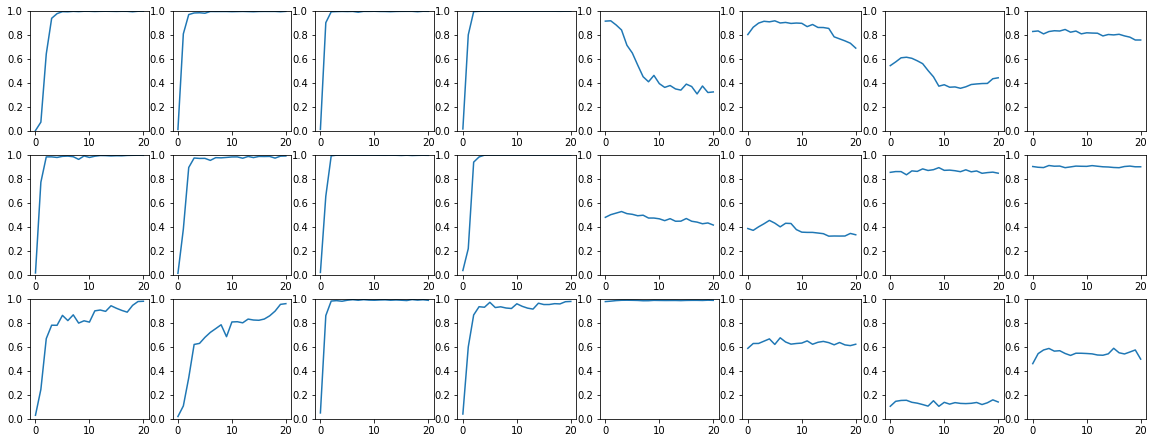

In [47]:
h, w = 3, 8
figscale = 2.5
fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))

for i, (v, (xidx, sanity)) in enumerate(list(asce_simures.items())[:12]):
    ax = axs[i//(w//2), i%(w//2)]
    ax.set_ylim([0, 1])
    sns.lineplot(xidx, sanity, ax=ax)
for i, (v, (xidx, sanity)) in enumerate(list(desc_simures.items())[:12]):
    ax = axs[i//(w//2), i%(w//2)+(w//2)]
    ax.set_ylim([0, 1])
    sns.lineplot(xidx, sanity, ax=ax)
plt.show()